Documentation Notes:

Lexi:
- models (arima, snaive) for the monthly aggregate

Bonny:
- EDA:
- weekly: on aggregate, and crime type

Stepan
- added to EDA (seasonal monthly and weekly graphs)
- formuled state space specification with Kalman filter
- specified and ran monthly and daily models (ARMA with errors) for precipitation effects

Jisoo:
- create distinction between violent and non violent (crime type)
- model comparisons for the monthly violent vs nonviolent
- specified and ran weekly multivariate models for precipitation and temp effects on crime


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "drive/Shared drives/Time Series Group 4/"

 finalproject_bm_ll.R		        Raleigh.csv
 finalproject_bm.R		        Raleigh_weather.csv
 Final_project_code_version1.R	        Raleigh_website.csv
 finalproject_jh_multivariate.R         socio_econ.csv
 finalproject_ts_v1.ipynb	        temp.csv
 finalproject_ts_v2_cleaned.ipynb       Time_Series_Project_Group4.ipynb
'Old Presentation.gslides'	       'Time Series Project Presentation - Group 4.pptx'
'Raleigh Crime Dataset Proposal.gdoc'


In [ ]:
# %pip install rpy2

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R

install.packages("readr")
install.packages("readxl")
install.packages("ggplot2")
install.packages("forecast")
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/readr_2.1.5.tar.gz'
Content type 'application/x-gzip' length 298065 bytes (291 KB)
downloaded 291 KB


The downloaded source packages are in
	‘/tmp/Rtmpzrh0bk/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/readxl_1.4.5.tar.gz'
Content type 'application/x-gzip' length 1636512 bytes (1.6 MB)
downloaded 1.6 MB


The downloaded source packages are in
	‘/tmp/Rtmpzrh0bk/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/ggplot2_3.5.1.tar.gz'
Content type 'application/x-gzip' length 3604371 bytes (3.4 MB)
downloaded 3.4 MB


The downloaded source packages are in
	‘/tmp/Rtmpzrh0bk/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘l

In [ ]:
%%R

install.packages("purrr")
install.packages("stringr")
install.packages("lubridate")
install.packages("fpp")
install.packages("uroot")
install.packages("bsts")
install.packages("scales")
install.packages("gridExtra")
install.packages("dlm")
install.packages("tidyr")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/purrr_1.0.4.tar.gz'
Content type 'application/x-gzip' length 256912 bytes (250 KB)
downloaded 250 KB


The downloaded source packages are in
	‘/tmp/Rtmpzrh0bk/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/stringr_1.5.1.tar.gz'
Content type 'application/x-gzip' length 176599 bytes (172 KB)
downloaded 172 KB


The downloaded source packages are in
	‘/tmp/Rtmpzrh0bk/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/lubridate_1.9.4.tar.gz'
Content type 'application/x-gzip' length 429341 bytes (419 KB)
downloaded 419 KB


The downloaded source packages are in
	‘/tmp/Rtmpzrh0bk/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘

In [ ]:
%%R

install.packages("Metrics")
install.packages("TSA")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/Metrics_0.1.4.tar.gz'
Content type 'application/x-gzip' length 14898 bytes (14 KB)
downloaded 14 KB


The downloaded source packages are in
	‘/tmp/Rtmpzrh0bk/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘leaps’, ‘locfit’

trying URL 'https://cran.rstudio.com/src/contrib/leaps_3.2.tar.gz'
Content type 'application/x-gzip' length 29375 bytes (28 KB)
downloaded 28 KB

trying URL 'https://cran.rstudio.com/src/contrib/locfit_1.5-9.12.tar.gz'
Content type 'application/x-gzip' length 207112 bytes (202 KB)
downloaded 202 KB

trying URL 'https://cran.rstudio.com/src/contrib/TSA_1.3.1.tar.gz'
Content type 'application/x-gzip' length 207505 bytes (202 KB)
downloaded 202 KB


The downloaded source packages are in
	‘/tmp/Rtmpzrh0bk/downloaded_packages’


In [ ]:
%%R


library(readr)
library(readxl)
library(dplyr)
library(purrr)
library(stringr)
library(ggplot2)
library(lubridate)
library(bsts)
library(fpp)
library(forecast)
library(uroot)
library(tidyr)
library(gridExtra)
library(scales)
library(dlm)
library(Metrics)
library(TSA)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union

Loading required package: BoomSpikeSlab
Loading required package: Boom

Attaching package: ‘Boom’

The following object is masked from ‘package:stats’:

    rWishart


Attaching package: ‘BoomSpikeSlab’

The following object is masked from ‘package:stats’:

    knots

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: xts

######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed t

In [ ]:
%%R
#Load main datasets

crime_df<- read.csv("drive/Shared drives/Time Series Group 4/Raleigh_website.csv")
crime_weather<- read.csv("drive/Shared drives/Time Series Group 4/Raleigh_weather.csv")
crime_temp <-read.csv("drive/Shared drives/Time Series Group 4/temp.csv")
crime_socio_econ <- read.csv("drive/Shared drives/Time Series Group 4/socio_econ.csv")

In [ ]:
%%R


str(crime_df)
colSums(is.na(crime_df))
colSums(crime_df == "", na.rm = TRUE)

crime_sub<- crime_df %>% select(-X,-Y,-reported_date, -updated_date,-agency)
crime_sub$date<- as.Date(paste0(crime_sub$reported_year,"-",crime_sub$reported_month,"-", crime_sub$reported_day))



'data.frame':	550230 obs. of  23 variables:
 $ X                     : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Y                     : num  NA NA NA NA NA NA NA NA NA NA ...
 $ OBJECTID              : int  12001 12002 12003 12004 12005 12006 12007 12008 12009 12010 ...
 $ GlobalID              : chr  "9cdee08d-11c8-4789-864b-6965a1b2e620" "6f6731f4-dd64-44c7-895c-555de2703c8a" "f0fd0e92-448e-4ca8-86c9-e6594564318b" "8a212e84-7b53-478a-b225-c212aa25d7fd" ...
 $ case_number           : chr  "" "" "" "" ...
 $ crime_category        : chr  "MISCELLANEOUS" "MISCELLANEOUS" "MISCELLANEOUS" "MISCELLANEOUS" ...
 $ crime_code            : chr  "81H" "81A" "81F" "81A" ...
 $ crime_description     : chr  "Miscellaneous/Missing Person (18 & over)" "Miscellaneous/All Other Non-Offenses" "Miscellaneous/Mental Commitment" "Miscellaneous/All Other Non-Offenses" ...
 $ crime_type            : chr  "" "" "" "" ...
 $ reported_block_address: chr  "" "" "" "" ...
 $ city_of_incident      : chr  "" "" "" 

## **EDA**

`summarise()` has grouped output by 'crime_category', 'crime_code'. You can
override using the `.groups` argument.
# A tibble: 149 × 4
# Groups:   crime_category, crime_code [126]
   crime_category  crime_code crime_description                    Count
   <chr>           <chr>      <chr>                                <int>
 1 MISCELLANEOUS   81A        Miscellaneous/All Other Non-Offenses 73066
 2 ASSAULT         25E        Assault/Simple                       44944
 3 LARCENY FROM MV 35F        Larceny/Theft from Motor Vehicle     30577
 4 VANDALISM       80B        All Other/Damage to Property (minor) 29038
 5 LARCENY         35H        Larceny/All Other                    26258
 6 DRUGS           54D        Drug Violation/Misdemeanor           24518
 7 LARCENY         35C        Larceny/Shoplifting                  23179
 8 DRUG VIOLATIONS 54Z        Drug Equipment/Paraphernalia         17439
 9 DRUGS           54C        Drug Violation/Felony                15708
10 MISCELLANEOUS 

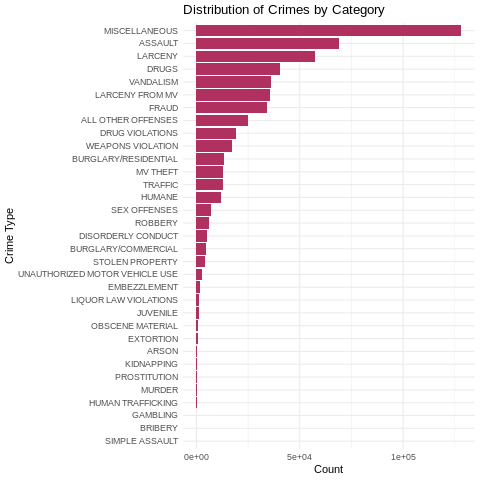

In [ ]:
%%R

################## EDA

# plot the crimes counts in a map

# checking crime by category, code and distribution
crime_distribution <- crime_sub %>%
  group_by(crime_category,crime_code, crime_description) %>%
  summarise(Count = n()) %>%
  arrange(desc(Count))  # Sort in descending order

print(crime_distribution)

## distribution of crime by category only
crime_catdist <- crime_sub %>%
  group_by(crime_category) %>%
  summarise(Count = n()) %>%
  arrange(desc(Count))  # Sort in descending order
print(crime_catdist)

# distribution of crime by category
ggplot(crime_catdist, aes(x = reorder(crime_category, Count), y = Count, fill = crime_category)) +
  geom_bar(stat = "identity",fill = 'maroon') +
  labs(title = "Distribution of Crimes by Category", x = "Crime Type", y = "Count") +
  theme_minimal() +
  coord_flip() +  # Flips x and y axes for a horizontal bar chart
  theme(legend.position = "none")  # Hide legend if unnecessary





# A tibble: 7 × 2
  district   Count
  <chr>      <int>
1 Southeast 122812
2 North     105768
3 Northeast  95538
4 Southwest  81978
5 Downtown   77337
6 Northwest  66340
7 UNK          457


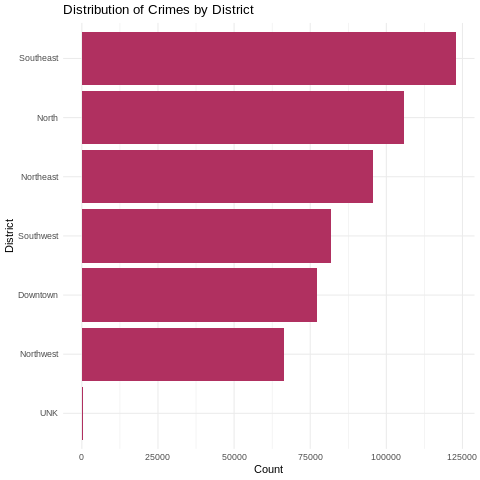

In [ ]:
%%R

# distribution of crime by region
crime_region <- crime_sub %>%
  group_by(district) %>%
  summarise(Count = n()) %>%
  arrange(desc(Count))  # Sort in descending order
print(crime_region)

ggplot(crime_region, aes(x = reorder(district, Count), y = Count, fill = crime_category)) +
  geom_bar(stat = "identity",fill = 'maroon') +
  labs(title = "Distribution of Crimes by District", x = "District", y = "Count") +
  theme_minimal() +
  coord_flip() +  # Flips x and y axes for a horizontal bar chart
  theme(legend.position = "none")  # Hide legend if unnecessary

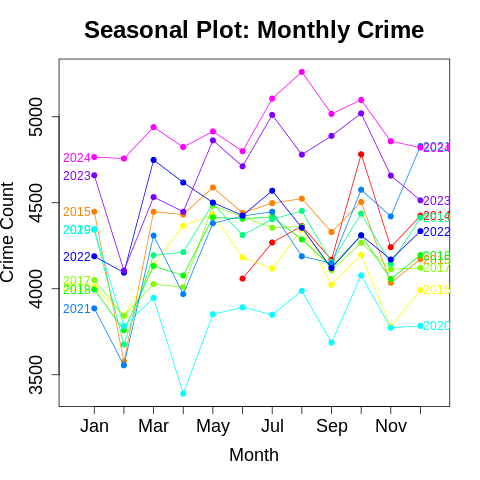

In [ ]:
%%R
crime_monthly <- crime_sub %>%
  filter(year(date) != 2025) %>%
  mutate(year_month = format(date, "%Y-%m")) %>%   # Create year-month format
  group_by(year_month) %>%
  summarise(Count = n())

## Create time series object with monthly frequency
df_monthly <- ts(crime_monthly$Count, start = c(2014, 6), frequency = 12)


#Crime for each Month over the Years
seasonplot(df_monthly,
           main = "Seasonal Plot: Monthly Crime",
           ylab = "Crime Count", xlab = "Month",
           col = rainbow(12), year.labels = TRUE, year.labels.left = TRUE, pch = 19,
           cex.axis = 1.5, cex.lab = 1.5, cex.main = 2)


In [ ]:
%%R

#Seasonal graphs by type of crime

# Aggregate monthly crime counts by category
library(tidyr)
library(lubridate)
library(forecast)

# Aggregate monthly crime counts by category
crime_monthly_crime_cat <- crime_sub %>%
  filter(year(date) != 2025) %>%
  mutate(year_month = format(date, "%Y-%m")) %>%  # Create year-month format
  group_by(year_month, crime_category) %>%
  summarise(Count = n(), .groups = 'drop')

# Spread the data to have one column per crime category
crime_monthly_spread <- crime_monthly_crime_cat %>%
  pivot_wider(names_from = crime_category, values_from = Count, values_fill = list(Count = 0))

# Convert the result into a time series object
# Assuming your data starts from 2014-01-01 and has monthly frequency
df_crime_monthly_crime_cat <- ts(crime_monthly_spread[, -1], start = c(2014, 1), frequency = 12)

# Define the total number of crime categories
total_crime_categories <- ncol(df_crime_monthly_crime_cat)

# Set the maximum number of plots per window (4 plots per window, 2x2 grid)
plots_per_chunk <- 4

# Loop through the crime categories in chunks
for (i in seq(1, total_crime_categories, by = plots_per_chunk)) {
  # Get the subset of crime categories for this chunk
  crime_subset <- colnames(df_crime_monthly_crime_cat)[i:min(i + plots_per_chunk - 1, total_crime_categories)]

  # Open a new graphics window for this chunk of plots
  dev.new()  # Open a new plot window

  # Set up the plotting area for this chunk (2 rows, 2 columns)
  par(mfrow = c(2, 2), mar = c(3, 3, 1, 1))

  # Loop through the current subset of crime categories
  for (col_name in crime_subset) {
    # Extract the time series for the current crime category
    crime_ts <- ts(df_crime_monthly_crime_cat[, col_name], start = c(2014, 6), frequency = 12)

    # Create a seasonal plot for the current crime category
    seasonplot(crime_ts,
               main = paste("Seasonal Plot: Monthly Crime -", col_name),
               ylab = "Crime Count",
               xlab = "Month",
               col = rainbow(12),
               year.labels = TRUE,
               year.labels.left = TRUE,
               pch = 19,
               cex.axis = 1.5,
               cex.lab = 1.5,
               cex.main = 1.3)  # Adjust title font size
  }

  # Reset the plotting layout after each chunk
  par(mfrow = c(1, 1))
}

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
Press Enter to see the next set of plots...


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
Press Enter to see the next set of plots...


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
Press Enter to see the next set of plots...


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
Press Enter to see the next set of plots...


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
Press Enter to see the next set of plots...


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
Press Enter to see the next set of plots...


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
Press Enter to see the next set of plots...


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


Exception ignored from cffi callback <function _consoleread at 0x785b9d2c18a0>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/rpy2/rinterface_lib/callbacks.py", line 66, in _consoleread
    reply = consoleread(s)
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/rpy2/rinterface_lib/callbacks.py", line 52, in consoleread
    return input(prompt)
           ^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 1177, in raw_input
    return self._input_request(
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 1219, in _input_request
    raise KeyboardInterrupt("Interrupted by user") from None
KeyboardInterrupt: Interrupted by user



`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


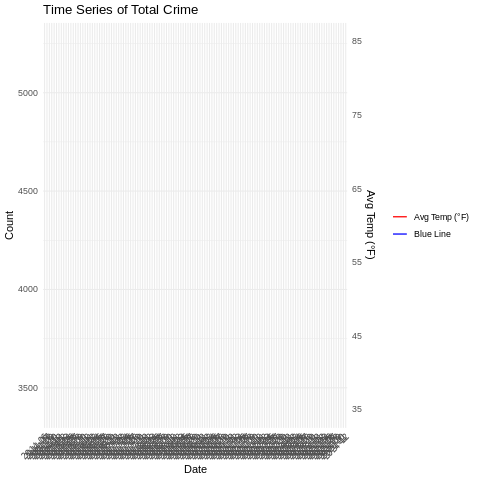

In [ ]:
%%R

#Create dataframe for monthly aggregate with temp and unemployment data


crime_monthly_multi <- crime_monthly %>%
  rename(date = year_month)

#Merge with temperature data

# Convert the 'date' column in crime_temp to Date format
crime_temp$date <- as.Date(crime_temp$date, format = "%m/%d/%y")

# Convert the 'date' column to 'year-month' format (YYYY-MM)
crime_temp$date <- format(crime_temp$date, "%Y-%m")


# Merge crime_monthly with crime_temp by date
crime_monthly_multi <- merge(crime_monthly_multi, crime_temp, by = "date", all.x = TRUE)


#Merge with unemployment data

# Convert the 'date' column in crime_socio_econ to Date format
crime_socio_econ$date <- as.Date(crime_socio_econ$date, format = "%m/%d/%y")

# Convert the 'date' column to 'year-month' format (YYYY-MM)
crime_socio_econ$date <- format(crime_socio_econ$date, "%Y-%m")


# Merge crime_monthly_multi with crime_socio_econ by date
crime_monthly_multi <- merge(crime_monthly_multi, crime_socio_econ, by = "date", all.x = TRUE)

#Append crimes by type of crime

#Create date column
time_index <- time(df_crime_monthly_crime_cat)
years <- floor(time_index)  # Extract the year
months <- round((time_index - years) * 12) + 1  # Extract the month
date_column <- paste(years, sprintf("%02d", months), sep = "-")
df_crime_monthly_crime_cat_df <- as.data.frame(df_crime_monthly_crime_cat)
df_crime_monthly_crime_cat_df$date <- date_column

# Merge crime_monthly_multi with df_crime_monthly_crime_cat by date
crime_monthly_multi <- merge(crime_monthly_multi, df_crime_monthly_crime_cat_df, by = "date", all.x = TRUE)

#display graphs over time of types of crime with temperature
library(scales)
#install.packages("gridExtra") # If not already installed
library(gridExtra)


# Clean the data (ensure all columns are numeric except 'date' and 'unemploy_rate')
crime_monthly_multi_clean <- crime_monthly_multi %>%
  mutate(across(-c(date, unemploy_rate), as.numeric))

#crime_monthly_multi_clean$date <- as.Date(paste0(crime_monthly_multi_clean$date, "-01"), format = "%Y-%m-%d")


#######PLOTTING DIFFERENT TYPES OF CRIME AGAINST AVG TEMP

# Calculate the min and max for the avg_temp column across the entire dataset
min_temp <- min(crime_monthly_multi_clean$avg_temp, na.rm = TRUE)
max_temp <- max(crime_monthly_multi_clean$avg_temp, na.rm = TRUE)

# Set the column name
col_name <- "Count"

# Calculate the min and max values for the primary y-axis (blue line) in the VANDALISM column
min_value <- min(crime_monthly_multi_clean[[col_name]], na.rm = TRUE)
max_value <- max(crime_monthly_multi_clean[[col_name]], na.rm = TRUE)

# Create the plot for the VANDALISM column
p <- ggplot(crime_monthly_multi_clean, aes(x = date)) +
  # Primary axis for the VANDALISM column (blue line)
  geom_line(aes(y = .data[[col_name]], color = "Blue Line"), size = 0.6) +
  # Secondary axis for avg_temp, scaled to fit 35 to 85 range
  geom_line(aes(y = (avg_temp - 35) * (max_value - min_value) / 50 + min_value, color = "Avg Temp (°F)"), size = 0.6) +
  # Adjust y-axis limits dynamically for the blue line (primary axis) and set secondary axis limits
  scale_y_continuous(
    name = col_name,  # Primary y-axis label
    sec.axis = sec_axis(~ (. - min_value) * 50 / (max_value - min_value) + 35,
                        name = "Avg Temp (°F)",
                        breaks = seq(35, 85, by = 10)),  # Secondary axis for avg_temp
    limits = c(min_value, max_value)  # Set the primary y-axis limits dynamically
  ) +
  labs(
    title = paste("Time Series of Total Crime"),
    x = "Date",
    y = col_name
  ) +
  # Custom colors for the legend
  scale_color_manual(values = c("Blue Line" = "blue", "Avg Temp (°F)" = "red")) +
  # Apply minimal theme and adjust text appearance
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.title = element_blank())  # Rotate x-axis labels and remove legend title

# Display the plot
print(p)



# Calculate the min and max for the avg_temp column across the entire dataset
min_temp <- min(crime_monthly_multi_clean$avg_temp, na.rm = TRUE)
max_temp <- max(crime_monthly_multi_clean$avg_temp, na.rm = TRUE)

# Set the column name
col_name <- "ASSAULT"

# Calculate the min and max values for the primary y-axis (blue line) in the VANDALISM column
min_value <- min(crime_monthly_multi_clean[[col_name]], na.rm = TRUE)
max_value <- max(crime_monthly_multi_clean[[col_name]], na.rm = TRUE)

# Create the plot for the VANDALISM column
p <- ggplot(crime_monthly_multi_clean, aes(x = date)) +
  # Primary axis for the VANDALISM column (blue line)
  geom_line(aes(y = .data[[col_name]], color = "Blue Line"), size = 0.6) +
  # Secondary axis for avg_temp, scaled to fit 35 to 85 range
  geom_line(aes(y = (avg_temp - 35) * (max_value - min_value) / 50 + min_value, color = "Avg Temp (°F)"), size = 0.6) +
  # Adjust y-axis limits dynamically for the blue line (primary axis) and set secondary axis limits
  scale_y_continuous(
    name = col_name,  # Primary y-axis label
    sec.axis = sec_axis(~ (. - min_value) * 50 / (max_value - min_value) + 35,
                        name = "Avg Temp (°F)",
                        breaks = seq(35, 85, by = 10)),  # Secondary axis for avg_temp
    limits = c(min_value, max_value)  # Set the primary y-axis limits dynamically
  ) +
  labs(
    title = paste("Time Series of", col_name),
    x = "Date",
    y = col_name
  ) +
  # Custom colors for the legend
  scale_color_manual(values = c("Blue Line" = "red", "Avg Temp (°F)" = "blue")) +
  # Apply minimal theme and adjust text appearance
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.title = element_blank())  # Rotate x-axis labels and remove legend title

# Display the plot
print(p)


###Display all types of crimes agianst avg temp

create_plot <- function(data, column) {
  y_range <- range(data[[column]], na.rm = TRUE)
  temp_range <- range(data$avg_temp, na.rm = TRUE)

  # Calculate the scaling factor
  scale_factor <- diff(y_range) / diff(temp_range)

  ggplot(data, aes(x = date)) +
    geom_line(aes(y = .data[[column]], color = column)) +
    geom_line(aes(y = (avg_temp - temp_range[1]) * scale_factor + y_range[1], color = "Avg Temp")) +
    scale_y_continuous(
      name = column,
      sec.axis = sec_axis(~ (. - y_range[1]) / scale_factor + temp_range[1],
                          name = "Avg Temp (°F)")
    ) +
    labs(title = paste(column, "and Average Temperature"), x = "Date") +
    theme_minimal() +
    theme(
      axis.text.x = element_text(angle = 45, hjust = 1),
      legend.position = "bottom",
      axis.title.y.right = element_text(color = "red"),
      axis.text.y.right = element_text(color = "red")
    ) +
    scale_color_manual(values = c("blue", "red"),
                       name = "Variables",
                       labels = c(column, "Avg Temp"))
}

columns_to_plot <- setdiff(names(crime_monthly_multi_clean), c("date", "avg_temp"))

plot_list <- lapply(columns_to_plot, function(col) create_plot(crime_monthly_multi_clean, col))

display_plots <- function(plot_list) {
  n_plots <- length(plot_list)
  n_pages <- ceiling(n_plots / 4)

  for (i in 1:n_pages) {
    start_index <- (i-1) * 4 + 1
    end_index <- min(i * 4, n_plots)
    current_plots <- plot_list[start_index:end_index]

    dev.new()
    do.call(grid.arrange, c(current_plots, ncol = 2))

    if (i < n_pages) {
      readline(prompt = "Press Enter to see the next set of plots...")
    }
  }
}

display_plots(plot_list)


`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


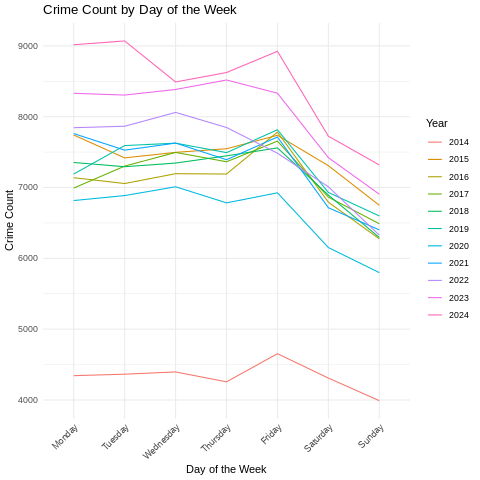

In [ ]:
%%R
#Crime for Day of the Week over the Years

# Remove year 2025
crime_filtered <- crime_sub %>%
  filter(year(date) != 2025)  # Remove data from 2025

# Group by day of the week and year, and calculate the crime count
crime_weekday_counts <- crime_filtered %>%
  mutate(year = year(date),  # Extract the year from the date
         day_of_week = weekdays(date)) %>%  # Get the day of the week
  group_by(year, day_of_week) %>%  # Group by year and day of the week
  summarise(crime_count = n()) %>%  # Count crimes for each combination
  ungroup()  # Ungroup after summarization

# Plot the data using ggplot
ggplot(crime_weekday_counts, aes(x = day_of_week, y = crime_count, color = as.factor(year), group = year)) +
  geom_line() +  # Line plot for each year
  scale_x_discrete(limits = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")) +
  labs(title = "Crime Count by Day of the Week",
       x = "Day of the Week",
       y = "Crime Count",
       color = "Year") +
  theme_minimal() +  # Clean theme
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for readability


# **ANALYSIS**

## **Univariate Yearly Analysis**



Optimal Box-Cox Transformation Parameter (λ): 0.4203607 


In addition: Warning message:
In kpss.test(df_daily) : p-value smaller than printed p-value


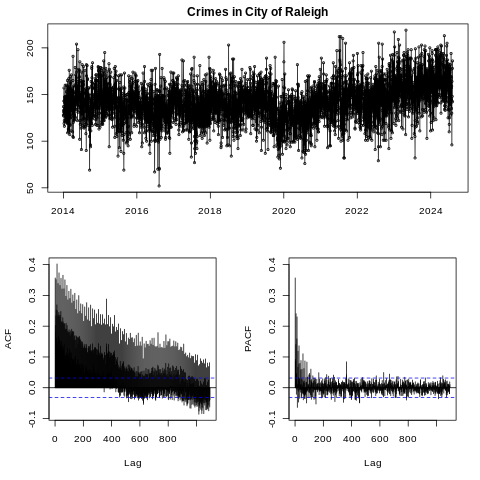

In [ ]:
%%R

##----------------------------- time series analysis
##--- yearly

crime_bydate <- crime_sub %>%
  filter(year(date) != 2025) %>%
  group_by(date) %>%
  summarise(Count = n())

crime_year<- crime_bydate %>%
  mutate(cm_year = year(date)) %>%
  group_by(cm_year) %>%
  summarise(cnt = sum(Count))

# convert it to time series
df_year <- ts(crime_year$cnt, start = c(2014), frequency = 1)
# plot time series
plot(df_year, main = "Time Series Plot of Yearly Crime in the City of Raleigh", xlab = "Time", ylab = "Values")


#split to train and test
train_data <- crime_year[crime_year$cm_year != 2024,]
test_data <- crime_year[crime_year$cm_year == 2024,]

train_tsdata<- ts(train_data$cnt, frequency = 1)
test_tsdata<- ts(test_data$cnt, frequency = 1)

# plot acf and pacf
par(mar = c(4, 4, 2, 1))
tsdisplay(train_tsdata,main= "Crimes in City of Raleigh")

#daily

df_daily <- ts(crime_bydate$Count, start = c(2014,1,1), frequency = 365)
# plot time series
plot(df_daily, main = "Time Series Plot of Yearly Crime in the City of Raleigh", xlab = "Time", ylab = "Values")

# plot acf and pacf
par(mar = c(4, 4, 2, 1))
tsdisplay(df_daily,main= "Crimes in City of Raleigh")

#test for variance
lambda <-BoxCox.lambda(df_daily)
# Print the lambda value
cat("Optimal Box-Cox Transformation Parameter (λ):", lambda, "\n")

#test for stationarity
kpss_test_result <- kpss.test(df_daily)
kpss_test_result

#Monthly

crime_monthly <- crime_sub %>%
  filter(year(date) != 2025) %>%
  mutate(year_month = format(date, "%Y-%m")) %>%   # Create year-month format
  group_by(year_month) %>%
  summarise(Count = n())

## Create time series object with monthly frequency
df_monthly <- ts(crime_monthly$Count, start = c(2014, 1), frequency = 12)




	Ljung-Box test

data:  Residuals from ARIMA(0,0,0) with non-zero mean
Q* = 0.13428, df = 3, p-value = 0.9874

Model df: 0.   Total lags used: 3



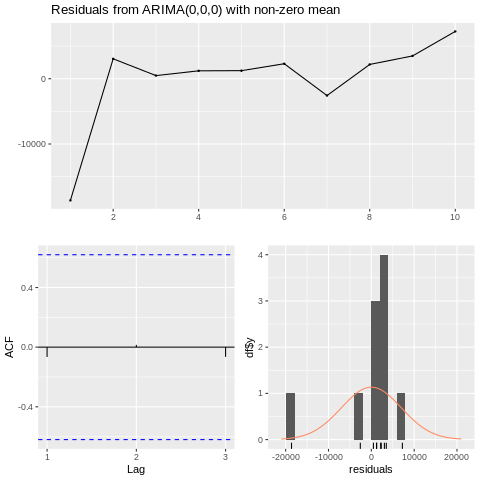

In [ ]:
%%R

################## MODELLING

#Yearly

#fit the arima
fit <- auto.arima(train_tsdata,seasonal=FALSE)
fit
checkresiduals(fit)


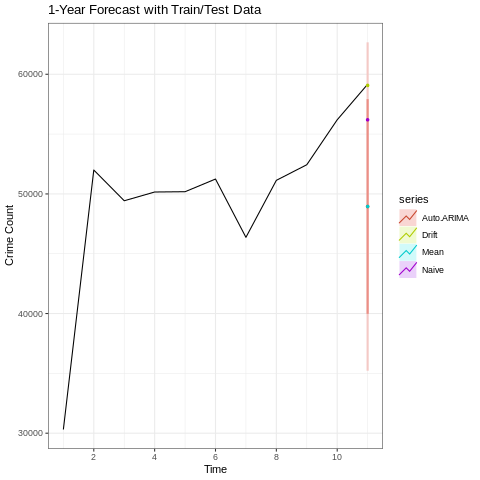

In [ ]:
%%R
#-------------------------------------------------------- Lexi
year_train_test <- ts(crime_year$cnt)

# forecast using the fit model
yearly_autoArima <- forecast(fit, h=1)

# forecast using the drift method
drift_model <- rwf(train_tsdata, drift=TRUE, h=1)
mean_model <- meanf(train_tsdata, h=1)
naive_model <- naive(train_tsdata, h=1)


# Plot the combined train and test data
autoplot(year_train_test) +

  # Overlay the auto.arima forecast
  autolayer(yearly_autoArima, series = "Auto.ARIMA", PI = TRUE) +

  # Overlay other model forecasts
  autolayer(drift_model, series = "Drift", PI = FALSE) +
  autolayer(mean_model, series = "Mean", PI = FALSE) +
  autolayer(naive_model, series = "Naive", PI = FALSE) +

  # Customize the plot
  ggtitle("1-Year Forecast with Train/Test Data") +
  xlab("Time") +
  ylab("Crime Count") +
  theme_bw()


	Ljung-Box test

data:  Residuals from ARIMA(2,1,3)
Q* = 17914, df = 725, p-value < 2.2e-16

Model df: 5.   Total lags used: 730



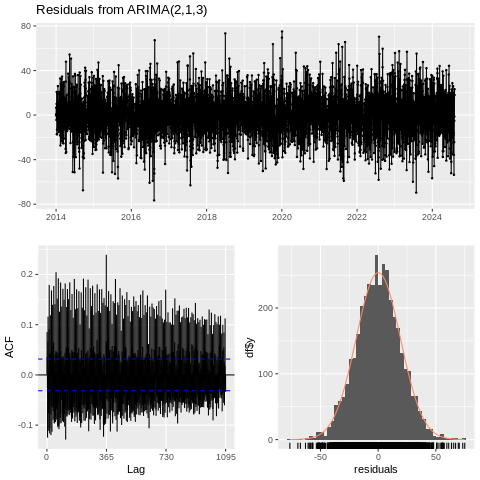

In [ ]:
%%R

#Daily

#fit the arima
fit_daily <- auto.arima(df_daily,seasonal=FALSE)
fit_daily
checkresiduals(fit_daily)

## **Univariate Year and Month Analysis**

In [ ]:
%%R
#-------------------------------------------------------- Lexi
# Dataframe by both year and month
crime_yrmonth <- crime_bydate %>%
  mutate(cm_year = year(date)) %>%
  mutate(cm_month = month(date)) %>%
  group_by(cm_year, cm_month) %>%
  summarise(Mon_Count = sum(Count)) %>%
  arrange(cm_year, cm_month)

# Define a time series for year and month
df_yearmonth <- ts(crime_yrmonth$Mon_Count, start = c(2014,6), frequency = 12)

# Split into train, test
train_yrmon <- window(df_yearmonth, start=2014.4, end=2023.99)
test_yrmon <- window(df_yearmonth, start=2024, end=2024.99)
combined_yrmon <- window(df_yearmonth, start=2014.4, end=2024.99)


`summarise()` has grouped output by 'cm_year'. You can override using the
`.groups` argument.


In addition: Warning messages:
1: In window.default(x, ...) : 'start' value not changed
2: In window.default(x, ...) : 'end' value not changed
3: In window.default(x, ...) : 'start' value not changed
4: In window.default(x, ...) : 'end' value not changed


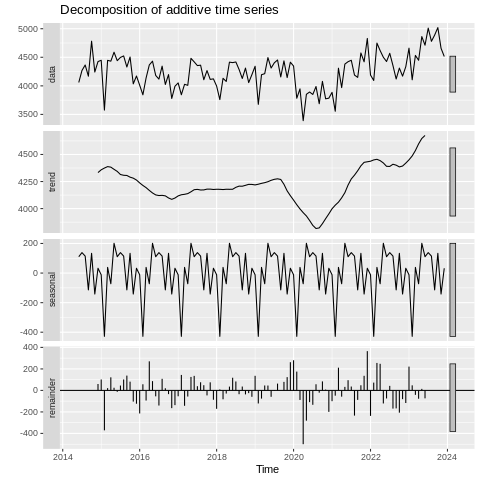

In [ ]:
%%R
# Decompose the training set into trend, seasonal, and remainder components
autoplot(decompose(train_yrmon))

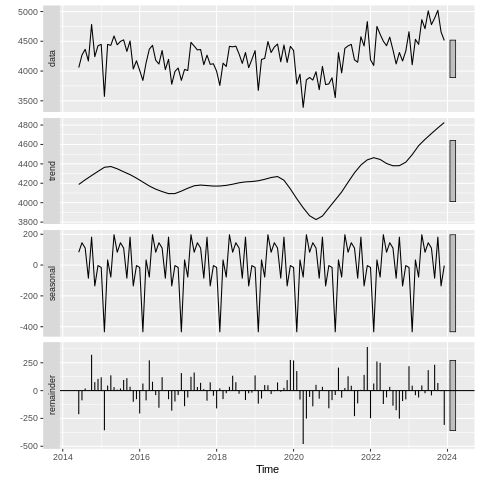

In [ ]:
%%R
# Decompose the training set into trend, seasonal, and remainder components
autoplot(stl(train_yrmon, s.window="periodic"))


	HEGY test for unit roots

data:  diffs_yrmonth

        statistic p-value    
t_1        -4.258   5e-04 ***
t_2       -4.5743       0 ***
F_3:4     18.6661       0 ***
F_5:6     22.4195       0 ***
F_7:8     19.4495       0 ***
F_9:10    14.0393       0 ***
F_11:12   20.7127       0 ***
F_2:12    18.5627       0 ***
F_1:12    20.5448       0 ***
---
Signif. codes: 0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1 

Deterministic terms: constant 
Lag selection criterion and order: fixed, 0
P-values: based on response surface regressions 


In addition: Warning message:
In kpss.test(diffs_yrmonth) : p-value greater than printed p-value


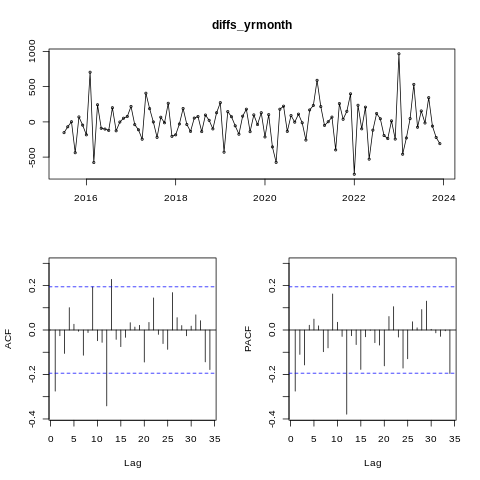

In [ ]:
%%R

# Upward trend, seasonality
tsdisplay(train_yrmon)

kpss.test(train_yrmon)
hegy.test(train_yrmon)

# Apply 1st order differencing d=1
diff_yrmonth <- diff(train_yrmon, differences=1)
tsdisplay(diff_yrmonth)

# Apply seasonal differencing D=1
diffs_yrmonth <- diff(diff_yrmonth, lag=12)
tsdisplay(diffs_yrmonth)
kpss.test(diffs_yrmonth)
hegy.test(diffs_yrmonth)
# Series is stationary after d=1 and D=1


In [ ]:
%%R

eacf(diffs_yrmonth)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x o o o o o o o o o o  x  x  o 
1 x o o o o o o o x o o  x  o  o 
2 x x x o o o o o o o o  x  o  o 
3 o x o o o o o o o o o  x  o  x 
4 x o o o o o o o o o o  x  o  o 
5 x x o o o o o o o o o  x  o  o 
6 x x o o o o o o o o o  x  o  o 
7 x x o o o o o o o o o  x  o  o 


In [ ]:
%%R

auto.arima(train_yrmon, d=1, D=1, seasonal=TRUE)  # AIC=1389.42   AICc=1389.83   BIC=1399.92
Arima(train_yrmon, order=c(0,1,1), seasonal=c(1,1,0))  # AIC=1399.07   AICc=1399.31   BIC=1406.94
Arima(train_yrmon, order=c(1,1,0), seasonal=c(0,1,1))  # AIC=1382.12   AICc=1382.36   BIC=1389.99
Arima(train_yrmon, order=c(1,1,0), seasonal=c(1,1,0))  # AIC=1402.74   AICc=1402.98   BIC=1410.61
Arima(train_yrmon, order=c(1,1,1), seasonal=c(0,1,1))  # AIC=1379.8   AICc=1380.21   BIC=1390.3
Arima(train_yrmon, order=c(0,1,1), seasonal=c(0,1,1))  # best model: AIC=1378.82   AICc=1379.06   BIC=1386.69

model_yrmon <- Arima(train_yrmon, order=c(0,1,1), seasonal=c(0,1,1))
yhat_yrmonModel <- forecast(model_yrmon, h=12)


In [ ]:
%%R

# Summary of the ARIMA model on the Year-Month data
summary(model_yrmon)

Series: train_yrmon 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
          ma1     sma1
      -0.4048  -0.9999
s.e.   0.1053   0.2771

sigma^2 = 32037:  log likelihood = -686.41
AIC=1378.82   AICc=1379.06   BIC=1386.69

Training set error measures:
                    ME     RMSE      MAE        MPE    MAPE      MASE
Training set -2.646319 166.9076 118.1918 -0.1319745 2.81009 0.4385989
                   ACF1
Training set 0.03155657


In [ ]:
%%R
#-------------------------------------------------------- Lexi

# Forecast the year-month series using the benchmark methods
drift_model <- rwf(train_yrmon, drift=TRUE, h=12)
mean_model <- meanf(train_yrmon, h=12)
naive_model <- naive(train_yrmon, h=12)
snaive_model <- snaive(train_yrmon, h=12)

# Fit the Holt-Winters method on the year-month series
hw_yrmon <- hw(train_yrmon, season="additive")   # attempted damped=TRUE and multiplicative seasonality, but additive yields the best result
print(summary(hw_yrmon))

# Forecast the year-month series using Additive Holt-Winters method
hw_yhat_yrmon <- forecast(hw_yrmon, h=12)



Forecast method: Holt-Winters' additive method

Model Information:
Holt-Winters' additive method 

Call:
hw(y = train_yrmon, seasonal = "additive")

  Smoothing parameters:
    alpha = 0.5911 
    beta  = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 4313.224 
    b = 0.7031 
    s = 200.7579 -72.9877 38.1671 -427.8035 -16.5495 33.1256
           -140.6153 169.4154 -97.6219 114.4371 139.7069 59.9679

  sigma:  182.7817

     AIC     AICc      BIC 
1760.346 1766.655 1807.010 

Error measures:
                   ME     RMSE      MAE         MPE     MAPE      MASE
Training set 3.376634 169.5904 127.9486 -0.03953522 3.042067 0.4748055
                   ACF1
Training set 0.02845775

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2024       4605.791 4371.547 4840.035 4247.545 4964.036
Feb 2024       4195.272 3923.156 4467.388 3779.107 4611.437
Mar 2024       4661.987 4356.650 4967.323 4195.015 5128.959
Apr 2024       4551.575 4216.284 4886.866 4038.791 50

In [ ]:
%%R
#-------------------------------------------------------- Lexi
# Find and fit the best Exponential Smoothing model to the training set
ets_yrmon <- ets(train_yrmon, model="ZZZ")
summary(ets_yrmon)

# Forecast the year-month series using Exponential Smoothing model
ets_yhat_yrmon <- forecast(ets_yrmon, h=12)
ets_yhat_yrmon

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2024       4617.560 4365.650 4869.470 4232.296 5002.824
Feb 2024       4204.359 3933.180 4475.537 3789.627 4619.090
Mar 2024       4659.917 4339.107 4980.727 4169.280 5150.553
Apr 2024       4565.089 4216.303 4913.876 4031.667 5098.512
May 2024       4830.769 4444.024 5217.515 4239.293 5422.246
Jun 2024       4703.310 4292.325 5114.294 4074.763 5331.856
Jul 2024       4760.459 4321.948 5198.970 4089.815 5431.104
Aug 2024       4756.755 4293.609 5219.902 4048.434 5465.077
Sep 2024       4533.348 4053.115 5013.581 3798.894 5267.802
Oct 2024       4800.384 4292.137 5308.631 4023.088 5577.681
Nov 2024       4495.240 3973.125 5017.355 3696.734 5293.746
Dec 2024       4654.990 4110.084 5199.896 3821.628 5488.352


Forecasted values for the next 12 months:
          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2024 4695.034 4259.405 4706.535 4576.995 4830.917 4708.166 4746.953 4690.329
          Sep      Oct      Nov      Dec
2024 4475.289 4721.971 4388.229 4503.203

Root Mean Square Error (RMSE): 364.5509 


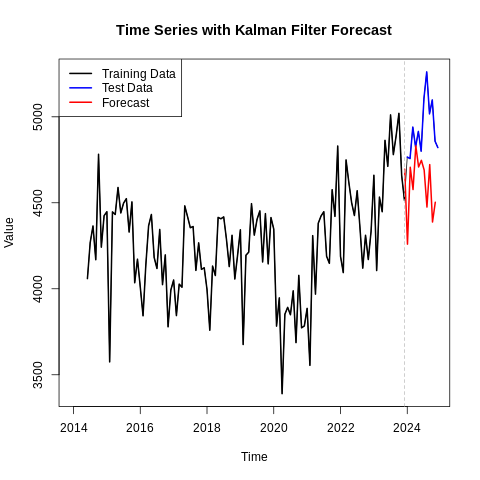

In [ ]:
%%R

#Kalman filter model on monthly data INTEGRATION


# Build the state space model with trend
build_ssm <- function(pars) {
  dlmModPoly(2, dV = exp(pars[1]), dW = c(exp(pars[2]), exp(pars[3]))) +
    dlmModSeas(12, dV = exp(pars[4]))
}

# Fit the model using maximum likelihood estimation
fit <- dlmMLE(train_yrmon, parm = c(0, 0, 0, 0), build = build_ssm)
model <- build_ssm(fit$par)

# Apply the Kalman filter
filtered <- dlmFilter(train_yrmon, model)

# Forecast the next 12 values
forecast <- dlmForecast(filtered, nAhead = 12)

# Create a time series for the forecast
forecast_ts <- ts(forecast$f, start = end(train_yrmon) + c(0, 1)/12, frequency = 12)

# Plot the data
plot(df_yearmonth, main = "Time Series with Kalman Filter Forecast",
     xlab = "Time", ylab = "Value", type = "l",
     xlim = c(start(df_yearmonth)[1], end(forecast_ts)[1]),
     ylim = range(c(df_yearmonth, forecast_ts)))

# Add lines for different parts of the data
lines(train_yrmon, col = "black", lwd = 2)
lines(test_yrmon, col = "blue", lwd = 2)
lines(forecast_ts, col = "red", lwd = 2)

# Add vertical lines to separate sections
abline(v = end(train_yrmon)[1] + (end(train_yrmon)[2] - 1)/12, col = "gray", lty = 2)

# Add legend
legend("topleft", legend = c("Training Data", "Test Data", "Forecast"),
       col = c("black", "blue", "red"), lty = 1, lwd = 2)

# Print the forecasted values
cat("Forecasted values for the next 12 months:\n")
print(forecast$f)

# Calculate and print RMSE
rmse_kalman <- sqrt(mean((test_yrmon - forecast$f[1:length(test_yrmon)])^2))
cat("\nRoot Mean Square Error (RMSE):", rmse_kalman, "\n")


=-=-=-=-= Iteration 0 Sat Mar  1 12:06:15 2025 =-=-=-=-=
=-=-=-=-= Iteration 100 Sat Mar  1 12:06:15 2025 =-=-=-=-=
=-=-=-=-= Iteration 200 Sat Mar  1 12:06:15 2025 =-=-=-=-=
=-=-=-=-= Iteration 300 Sat Mar  1 12:06:16 2025 =-=-=-=-=
=-=-=-=-= Iteration 400 Sat Mar  1 12:06:16 2025 =-=-=-=-=
=-=-=-=-= Iteration 500 Sat Mar  1 12:06:16 2025 =-=-=-=-=
=-=-=-=-= Iteration 600 Sat Mar  1 12:06:17 2025 =-=-=-=-=
=-=-=-=-= Iteration 700 Sat Mar  1 12:06:17 2025 =-=-=-=-=
=-=-=-=-= Iteration 800 Sat Mar  1 12:06:17 2025 =-=-=-=-=
=-=-=-=-= Iteration 900 Sat Mar  1 12:06:18 2025 =-=-=-=-=


In addition: Warning messages:
1: 'newdata' had 12 rows but variables found have 115 rows 
2: 'newdata' had 12 rows but variables found have 115 rows 


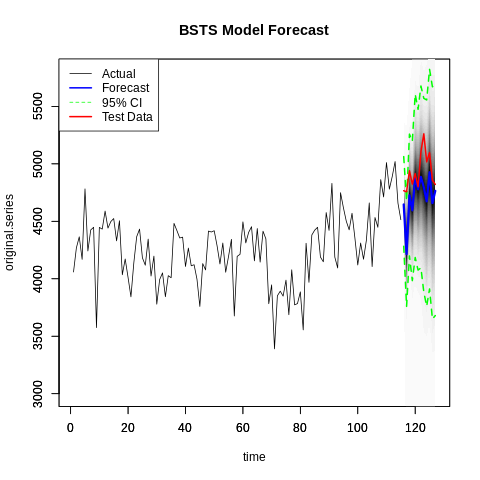

In [ ]:
%%R

#####BSTS MODEL



#BSTS with a dummy for 2020

# Extract the year from the date (which is in the "YYYY-MM" format)
years <- substr(crime_yrmonth$cm_year, 1, 4)

# Create the dummy variable for 2020 (1 for 2020, 0 otherwise)
dummy_2020 <- ifelse(years == "2020", 1, 0)


# Specify the model components
ss <- list()
ss <- AddStudentLocalLinearTrend(ss, train_yrmon)
ss <- AddSeasonal(ss, train_yrmon, nseasons = 12)  # Monthly seasonality
ss <- AddDynamicRegression(ss, train_yrmon ~ dummy_2020[1:115])
length(train_yrmon)
# Fit the model
model_bsts <- bsts(train_yrmon ~ dummy_2020[1:115], state.specification = ss, niter = 1000, seed = 1014)

# Generate forecasts for 12 steps ahead
dummy_forecast <- c(rep(0, 12))
# Generate forecasts for 12 steps ahead
fc_bsts <- predict(model_bsts, horizon = 12, newdata = data.frame(dummy_2020 = dummy_forecast))

# Plot the forecasts
plot(fc_bsts, ylim = c(3000, 5800))
# Add test data
lines(length(train_yrmon) + 1:12, test_yrmon, col = "red", lwd = 2)

# Add title to the plot
title(main = "BSTS Model Forecast")

# Add legend
legend("topleft", legend = c("Actual", "Forecast", "95% CI", "Test Data"),
       col = c("black", "blue", "green", "red"), lty = c(1, 1, 2, 1), lwd = c(1, 2, 1, 2))


# Extract the forecasted values
forecast_bsts <- fc_bsts$mean





In [ ]:

#FOURIER TRANSFORM - DAILY TO MONTHLY FORECAST

crime_daily_agg <- crime_sub %>%
  filter(year(date) != 2025) %>%  # Exclude data from the year 2025
  group_by(date) %>%  # Group by date
  summarise(
    max_prcp = ifelse(all(is.na(prcp)), 0, max(prcp, na.rm = TRUE)),  # Max precipitation per day, replacing NA with 0
    Count = n()  # Count of rows per day
  ) %>%
  ungroup()  # Remove grouping

View(crime_daily_agg)

df_daily_agg <- ts(crime_daily_agg$Count, start = c(2014, 6,1), frequency = 365)
df_daily_agg_train <- crime_daily_agg %>%
  filter(date >= as.Date("2014-01-01") & date <= as.Date("2023-12-31"))

# Create a time series object
df_daily_agg_train <- ts(df_daily_agg_train$Count,
                              start = c(2014, 1),
                              frequency = 365)
df_daily_agg_test <- crime_daily_agg %>%
  filter(date >= as.Date("2024-01-01"))

df_daily_agg_test <- ts(df_daily_agg_test$Count,
                             start = c(2024, 1),
                             frequency = 365)



kpss_test_result_agg <- kpss.test(df_daily_agg)
kpss_test_result_agg

acf(df_daily_agg)


#Run daily model
xreg <- pull(crime_daily_agg,max_prcp)
fit_agg_daily_armaerr <- auto.arima(df_daily_agg, xreg=xreg)
summary(fit_agg_daily_armaerr)
checkresiduals(fit_agg_daily_armaerr)

#periodogram

periodogram(df_daily_agg)
pg <- periodogram(df_daily_agg)
pg

dominant_freq <- pg$freq[which.max(pg$spec)]
dominant_freq

period <- 1 / dominant_freq
period

spectrum(df_daily_agg)



# Function to fit ARIMA model with Fourier terms and calculate AIC
find_optimal_k <- function(ts_data, max_k = 10) {
  aic_values <- numeric(max_k)  # To store AIC values for each k

  # Loop over different values of k (number of Fourier terms)
  for (k in 1:max_k) {
    # Fit ARIMA model with Fourier terms as exogenous variables
    fit <- try(auto.arima(ts_data, xreg = fourier(ts_data, K = k), seasonal = FALSE), silent = TRUE)

    # Check if the model fitting was successful
    if (inherits(fit, "try-error")) {
      aic_values[k] <- NA  # Assign NA if fitting fails
    } else {
      aic_values[k] <- fit$aic  # Store the AIC value for the current k
    }
  }

  # Find the value of k with the lowest AIC
  optimal_k <- which.min(aic_values)

  # Return both the optimal k and AIC values
  return(list(optimal_k = optimal_k, aic_values = aic_values))
}


# Call the function and store the result
result <- find_optimal_k(df_daily_agg_train, max_k = 10)

# Extract optimal k and AIC values
optimal_k <- result$optimal_k
aic_values <- result$aic_values  # Save AIC values for later use

# Print optimal k
cat("Optimal k:", optimal_k, "\n")

# Save AIC values to a CSV file (optional)
write.csv(data.frame(K = 1:10, AIC = aic_values), "aic_values.csv", row.names = FALSE)

# Visualize AIC values across different k values
plot(1:10, aic_values, type = "b", xlab = "Number of Fourier Terms (k)",
     ylab = "AIC", main = "AIC for Different k Values", pch = 19, col = "blue")

# Print AIC values (optional)
print(data.frame(K = 1:10, AIC = aic_values))


#fit ARIMA with Fourier model


# Fit ARIMA model with Fourier terms
fit_fourier <- auto.arima(df_daily_agg_train, xreg = fourier(df_daily_agg_train, K = 9), seasonal = FALSE)

# Forecast for the next 365 days
horizon <- 365

# Define start date as January 1, 2025
start_date <- as.Date("2024-01-01")

# Generate the Fourier terms for the future period
future_fourier_terms <- fourier(df_daily_agg_train, K = 9, h = horizon)

# Forecast using Fourier terms
fc_fourier <- forecast(fit_fourier, xreg = future_fourier_terms)

# Convert forecast to a data frame
forecast_df <- data.frame(
  date = seq(from = start_date, by = "day", length.out = horizon),  # Ensure forecast starts on Jan 1, 2025
  forecast = fc_fourier$mean  # Extract mean forecast values
)

# Aggregate daily forecast to monthly
forecast_monthly_fourier <- forecast_df %>%
  mutate(year_month = format(date, "%Y-%m")) %>%  # Create year-month column
  group_by(year_month) %>%
  summarise(monthly_forecast = sum(forecast, na.rm = TRUE)) %>%  # Sum daily values for each month
  ungroup()

fc_daily_agg_fourier <- ts(forecast_monthly_fourier$monthly_forecast,
                             start = c(2024, 1),
                             frequency = 12)





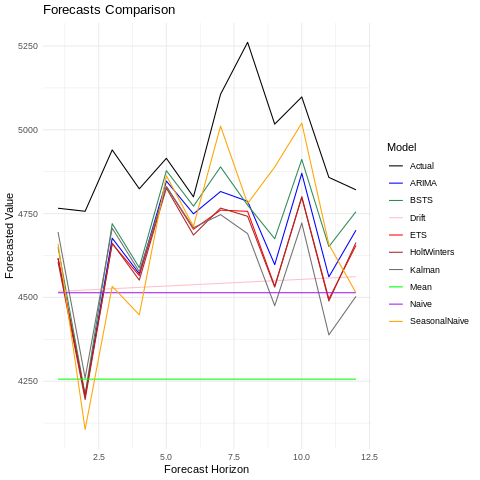

In [ ]:
%%R
#-------------------------------------------------------- Lexi
# Create a data frame to store forecasts
forecasts_df <- data.frame(
  Time = 1:12,
  ARIMA = yhat_yrmonModel$mean,
  Drift = drift_model$mean,
  Mean = mean_model$mean,
  Naive = naive_model$mean,
  SeasonalNaive = snaive_model$mean,
  BSTS = fc_bsts$mean,
  HoltWinters = hw_yhat_yrmon$mean,
  ETS = ets_yhat_yrmon$mean,
  Kalman = as.vector(forecast$f)   # Kalman Filter forecast values
)

# Convert the test set from ts object into a dataframe for plotting
test_df <- data.frame(
  Time = 1:length(test_yrmon),
  Actual = as.numeric(test_yrmon)
)

# Reshape the data frame for ggplot2
forecasts_long <- forecasts_df %>%
  pivot_longer(cols = -Time, names_to = "Model", values_to = "Forecast")

# Extend the 'forecasts_long' data frame to include the test set
forecasts_long <- rbind(
  forecasts_long,
  data.frame(Time = test_df$Time, Model = "Actual", Forecast = test_df$Actual)
)

# Create a plot to compare various forecasts against the test set
ggplot(forecasts_long, aes(x = Time, y = Forecast, color = Model)) +
  geom_line() +
  labs(title = "Forecasts Comparison",
       x = "Forecast Horizon",
       y = "Forecasted Value") +
  scale_color_manual(values = c("Actual" = "black",
                                "ARIMA" = "blue",
                                "Drift" = "pink",
                                "Mean" = "green",
                                "Naive" = "purple",
                                "SeasonalNaive" = "orange",
                                "BSTS" = "seagreen",
                                "HoltWinters" = "brown",
                                "ETS" = "red",
                                "Kalman" = "grey44")) +
  theme_minimal()


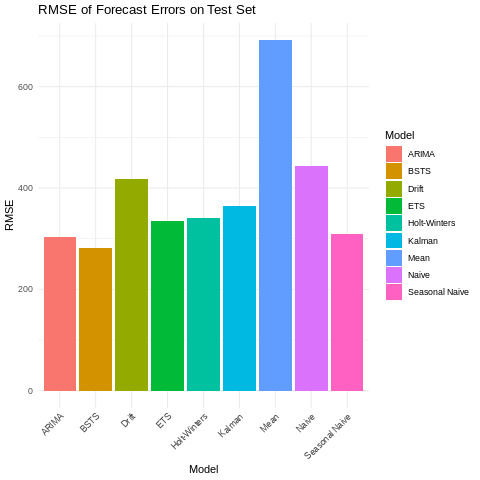

In [ ]:
%%R
#-------------------------------------------------------- Lexi
# Plot the RMSE of the forecast errors on the test set

# Calculate RMSE for each model
rmse_arima <- rmse(yhat_yrmonModel$mean, test_yrmon)
rmse_drift <- rmse(drift_model$mean, test_yrmon)
rmse_mean <- rmse(mean_model$mean, test_yrmon)
rmse_naive <- rmse(naive_model$mean, test_yrmon)
rmse_snaive <- rmse(snaive_model$mean, test_yrmon)
rmse_bsts <- rmse(fc_bsts$mean, test_yrmon)
rmse_hw <- rmse(hw_yhat_yrmon$mean, test_yrmon)
rmse_ets <- rmse(ets_yhat_yrmon$mean, test_yrmon)

rmse_df <- data.frame(
  Model = c("ARIMA", "Drift", "Mean", "Naive", "Seasonal Naive","BSTS", "Holt-Winters", "ETS",
            "Kalman"),
  RMSE = c(rmse_arima, rmse_drift, rmse_mean, rmse_naive, rmse_snaive, rmse_bsts, rmse_hw, rmse_ets,
           rmse_kalman)
)

ggplot(rmse_df, aes(x = Model, y = RMSE, fill = Model)) +
  geom_bar(stat = "identity") +
  labs(title = "RMSE of Forecast Errors on Test Set",
       x = "Model",
       y = "RMSE") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [ ]:
%%R
rmse_df

           Model     RMSE
1          ARIMA 303.6893
2          Drift 417.2689
3           Mean 691.1045
4          Naive 443.2690
5 Seasonal Naive 309.5175
6           BSTS 282.1668
7   Holt-Winters 339.7776
8            ETS 334.7489
9         Kalman 364.5509


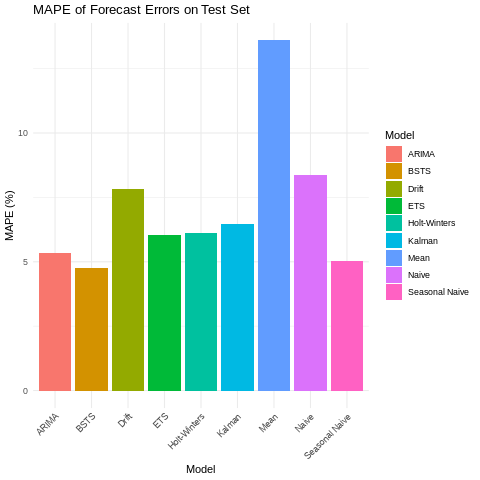

In [ ]:
%%R
#-------------------------------------------------------- Lexi
# Plot the MAPE of the forecast errors on the test set

# Calculate MAPE for each model
mape_arima <- mean(abs((test_yrmon-yhat_yrmonModel$mean))/test_yrmon) * 100
mape_drift <- mean(abs((test_yrmon-drift_model$mean))/test_yrmon) * 100
mape_mean <- mean(abs((test_yrmon-mean_model$mean))/test_yrmon) * 100
mape_naive <- mean(abs((test_yrmon-naive_model$mean))/test_yrmon) * 100
mape_snaive <- mean(abs((test_yrmon-snaive_model$mean))/test_yrmon) * 100
mape_bsts <- mean(abs((test_yrmon-fc_bsts$mean))/test_yrmon) * 100
mape_hw <- mean(abs((test_yrmon-hw_yhat_yrmon$mean))/test_yrmon) * 100
mape_ets <- mean(abs((test_yrmon-ets_yhat_yrmon$mean))/test_yrmon) * 100
mape_kalman <- mean(abs((test_yrmon-as.vector(forecast$f))/test_yrmon)) * 100


mape_df <- data.frame(
  Model = c("ARIMA", "Drift", "Mean", "Naive", "Seasonal Naive","BSTS","Holt-Winters", "ETS",
            "Kalman"),
  MAPE = c(mape_arima, mape_drift, mape_mean, mape_naive, mape_snaive, mape_bsts, mape_hw, mape_ets,
           mape_kalman)
)

ggplot(mape_df, aes(x = Model, y = MAPE, fill = Model)) +
  geom_bar(stat = "identity") +
  labs(title = "MAPE of Forecast Errors on Test Set",
       x = "Model",
       y = "MAPE (%)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x-axis labels for readability

In [ ]:
%%R
mape_df

           Model      MAPE
1          ARIMA  5.324176
2          Drift  7.833828
3           Mean 13.591876
4          Naive  8.357160
5 Seasonal Naive  5.033605
6           BSTS  4.766174
7   Holt-Winters  6.131007
8            ETS  6.019817
9         Kalman  6.477849


**Model Diagnostic**


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)(0,1,1)[12]
Q* = 20.336, df = 21, p-value = 0.5

Model df: 2.   Total lags used: 23



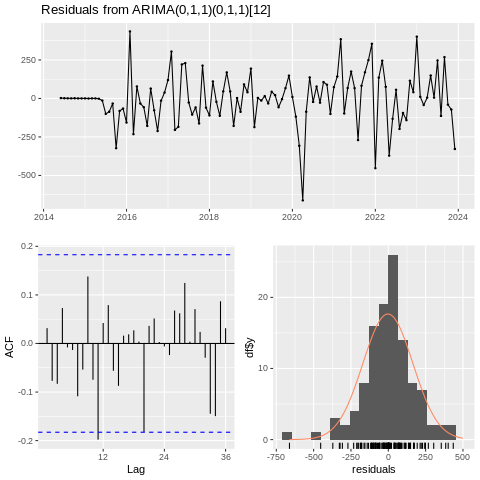

In [ ]:
%%R

# Check the residuals from the ARIMA model
checkresiduals(model_yrmon)


	Ljung-Box test

data:  Residuals from Holt-Winters' additive method
Q* = 18.803, df = 23, p-value = 0.7126

Model df: 0.   Total lags used: 23



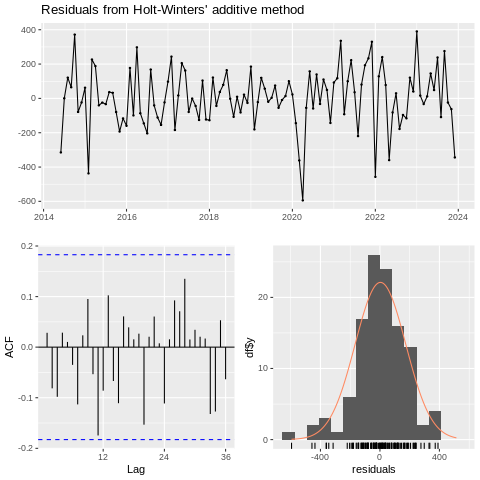

In [ ]:
%%R

# Check the residuals from the Holt-Winters model
checkresiduals(hw_yrmon)

**Cross Validation for the Best Models**

In [ ]:
%%R
#-------------------------------------------------------- Lexi
# Cross validation for ARIMA model

# Fit the ARIMA(0,1,1)(0,1,1)[12] model to each rolling origin subset
arima_cv <- function(x, h){forecast(Arima(x, order=c(0,1,1), seasonal=c(0,1,1)), h=h)}
arima_cv_result <- tsCV(combined_yrmon, arima_cv, h=12, window=90)

# Compute the RMSE for each forecast horizon (h)
rmse_values <- c()
for (i in 1:ncol(arima_cv_result)) {
  errors <- arima_cv_result[, i]

  errors <- na.omit(errors)

  rmse_values[i] <- rmse(errors, rep(0, length(errors))) # We use 0 because we are calculating the error.
}
names(rmse_values) <- colnames(arima_cv_result)
rmse_values

     h=1      h=2      h=3      h=4      h=5      h=6      h=7      h=8 
229.7940 251.7183 256.7953 243.1847 260.6761 273.7022 303.6032 327.2340 
     h=9     h=10     h=11     h=12 
333.3494 346.0659 354.9736 340.8846 


In [ ]:
%%R
#-------------------------------------------------------- Lexi

# Cross-validation for seasonal naive

# Fit the seasonal naive method to each rolling origin subset
snaive_cv <- function(x,h){snaive(x, h=h)}
snaive_cv_result <- tsCV(combined_yrmon, snaive_cv, h=12, window=90)

# Compute the RMSE for each forecast horizon (h)
rmse_values_sniave <- c()
for (i in 1:ncol(snaive_cv_result)) {
  errors <- snaive_cv_result[, i]

  errors <- na.omit(errors)

  rmse_values_sniave[i] <- rmse(errors, rep(0, length(errors)))
}
names(rmse_values_sniave) <- colnames(snaive_cv_result)
rmse_values_sniave

     h=1      h=2      h=3      h=4      h=5      h=6      h=7      h=8 
400.2181 366.3765 368.0269 361.7771 359.1409 346.1941 351.0726 356.8754 
     h=9     h=10     h=11     h=12 
362.2686 367.3438 374.0458 377.6116 


In [ ]:
%%R

# Cross-validation for Holt-Winters method

# Fit the additive holt winters method to each rolling origin subset
hw_cv <- function(x,h){forecast(hw(x, season="additive"), h=h)}
hw_cv_result <- tsCV(combined_yrmon, hw_cv, h=12, window=90)

# Compute the RMSE for each forecast horizon (h)
rmse_values_hw <- c()
for (i in 1:ncol(hw_cv_result)) {
  errors <- hw_cv_result[, i]   # For the current horizon

  errors <- na.omit(errors)

  rmse_values_hw[i] <- rmse(errors, rep(0, length(errors))) # We use 0 because we are calculating the error.
}
names(rmse_values_hw) <- colnames(hw_cv_result)
rmse_values_hw


     h=1      h=2      h=3      h=4      h=5      h=6      h=7      h=8 
220.2981 241.4555 249.0724 239.3695 253.5886 259.5588 290.4255 316.8276 
     h=9     h=10     h=11     h=12 
329.5982 343.6156 355.2980 352.1527 


In [ ]:
%%R
#-------------------------------------------------------- Lexi
# Cross-validation for the ETS model

# Fit the ETS to each rolling origin subset
ets_cv <- function(x,h){forecast(ets(x, model="ZZZ"), h=h)}
ets_cv_result <- tsCV(combined_yrmon, ets_cv, h=12)

# Compute the RMSE for each forecast horizon (h)
rmse_values_ets <- c()
for (i in 1:ncol(ets_cv_result)) {
  errors <- ets_cv_result[, i]
  errors <- na.omit(errors)
  rmse_values_ets[i] <- rmse(errors, rep(0, length(errors)))
}
names(rmse_values_ets) <- colnames(ets_cv_result)
rmse_values_ets


     h=1      h=2      h=3      h=4      h=5      h=6      h=7      h=8 
225.7842 242.3016 268.7989 287.4112 281.7907 319.6339 306.8184 322.5438 
     h=9     h=10     h=11     h=12 
328.4355 350.3515 364.1382 362.5411 


In [ ]:
%%R
#-------------------------------------------------------- Lexi

# Cross-validation function for BSTS
bsts_cv <- function(x, h) {
  # Define state space components dynamically based on the training set
  ss <- list()
  ss <- AddStudentLocalLinearTrend(ss, x)  # Use the training data for trend
  ss <- AddSeasonal(ss, x, nseasons = 12)  # Monthly seasonality
  ss <- AddDynamicRegression(ss, x ~ dummy_2020[1:length(x)])  # Dynamic regression

  # Fit the BSTS model
  model <- bsts(x ~ dummy_2020[1:length(x)],
                state.specification = ss,
                niter = 1000,
                seed = 1014)

  # Forecast using the BSTS model
  pred <- predict(model,
                  horizon = h,
                  newdata = data.frame(dummy_2020 = dummy_2020[(length(x) + 1):(length(x) + h)]))

}

# Apply tsCV to compute cross-validation errors
bsts_cv_result <- tsCV(combined_yrmon, bsts_cv, h = 12, window = 90)

# Compute RMSE for each forecast horizon (h)
rmse_values_bsts <- sapply(1:ncol(bsts_cv_result), function(i) {
  errors <- na.omit(bsts_cv_result[, i])
  rmse(errors, rep(0, length(errors)))
})

# Assign forecast horizons as names for RMSE values
names(rmse_values_bsts) <- paste0("h=", 1:12)

# Print RMSE values for each horizon
rmse_values_bsts


=-=-=-=-= Iteration 0 Sat Mar  1 12:15:58 2025 =-=-=-=-=
=-=-=-=-= Iteration 100 Sat Mar  1 12:15:58 2025 =-=-=-=-=
=-=-=-=-= Iteration 200 Sat Mar  1 12:15:58 2025 =-=-=-=-=
=-=-=-=-= Iteration 300 Sat Mar  1 12:15:58 2025 =-=-=-=-=
=-=-=-=-= Iteration 400 Sat Mar  1 12:15:59 2025 =-=-=-=-=
=-=-=-=-= Iteration 500 Sat Mar  1 12:15:59 2025 =-=-=-=-=
=-=-=-=-= Iteration 600 Sat Mar  1 12:15:59 2025 =-=-=-=-=
=-=-=-=-= Iteration 700 Sat Mar  1 12:15:59 2025 =-=-=-=-=
=-=-=-=-= Iteration 800 Sat Mar  1 12:16:00 2025 =-=-=-=-=
=-=-=-=-= Iteration 900 Sat Mar  1 12:16:00 2025 =-=-=-=-=
=-=-=-=-= Iteration 0 Sat Mar  1 12:16:00 2025 =-=-=-=-=
=-=-=-=-= Iteration 100 Sat Mar  1 12:16:01 2025 =-=-=-=-=
=-=-=-=-= Iteration 200 Sat Mar  1 12:16:01 2025 =-=-=-=-=
=-=-=-=-= Iteration 300 Sat Mar  1 12:16:01 2025 =-=-=-=-=
=-=-=-=-= Iteration 400 Sat Mar  1 12:16:01 2025 =-=-=-=-=
=-=-=-=-= Iteration 500 Sat Mar  1 12:16:02 2025 =-=-=-=-=
=-=-=-=-= Iteration 600 Sat Mar  1 12:16:02 2025 =-=-=-=-=
=

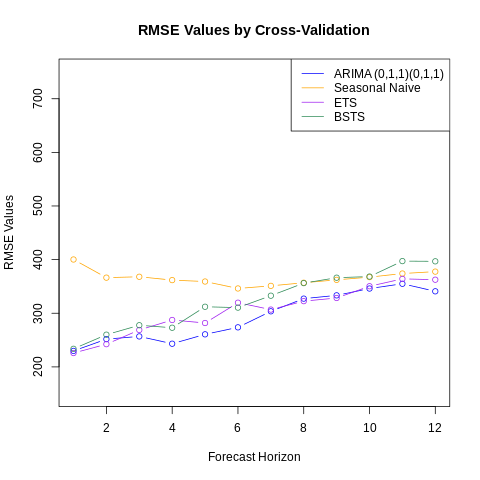

In [ ]:
%%R
#-------------------------------------------------------- Lexi

# Plot the Cross Validation Results

plot(rmse_values, type="n", main="RMSE Values by Cross-Validation",
     xlab="Forecast Horizon", ylab="RMSE Values", ylim=c(150, 750))
lines(rmse_values, type="b", col="blue")
lines(rmse_values_sniave, type="b", col="orange")
#lines(rmse_values_hw, type="b", col="brown")
lines(rmse_values_ets, type="b", col="purple")
lines(rmse_values_bsts, type="b", col="seagreen")

legend("topright", legend=c("ARIMA (0,1,1)(0,1,1)", "Seasonal Naive",
                            "ETS", "BSTS"),
                            col=c("blue", "orange", "purple", "seagreen"), lty=1)


In [ ]:
%%R
forecasts_df

   Time    ARIMA    Drift     Mean Naive SeasonalNaive     BSTS HoltWinters
1     1 4616.057 4517.991 4256.157  4514          4660 4649.699    4605.791
2     2 4205.392 4521.982 4256.157  4514          4106 4211.048    4195.272
3     3 4676.727 4525.974 4256.157  4514          4533 4719.972    4661.987
4     4 4570.617 4529.965 4256.157  4514          4448 4588.715    4551.575
5     5 4847.064 4533.956 4256.157  4514          4863 4878.137    4826.061
6     6 4749.314 4537.947 4256.157  4514          4712 4772.201    4686.027
7     7 4815.914 4541.939 4256.157  4514          5011 4889.426    4766.482
8     8 4786.715 4545.930 4256.157  4514          4780 4775.050    4741.954
9     9 4597.815 4549.921 4256.157  4514          4889 4675.097    4530.667
10   10 4870.316 4553.912 4256.157  4514          5020 4911.632    4798.439
11   11 4561.217 4557.904 4256.157  4514          4658 4651.575    4489.143
12   12 4700.418 4561.895 4256.157  4514          4514 4755.877    4663.584
        ETS 

In [ ]:
%%R
#-------------------------------------------------------- Lexi
# Ensemble YearMonth
ensemble_data <- forecasts_df %>%
  select(-Time) %>%
  mutate(Actual = test_yrmon)

ensemble_data
# Simple averaging ensemble
#forecasts_df$Ensemble_Avg <- rowMeans(forecasts_df[, -7])

      ARIMA    Drift     Mean Naive SeasonalNaive     BSTS HoltWinters      ETS
1  4616.057 4517.991 4256.157  4514          4660 4649.453    4605.791 4617.560
2  4205.392 4521.982 4256.157  4514          4106 4211.228    4195.272 4204.359
3  4676.727 4525.974 4256.157  4514          4533 4705.349    4661.987 4659.917
4  4570.617 4529.965 4256.157  4514          4448 4577.978    4551.575 4565.089
5  4847.064 4533.956 4256.157  4514          4863 4861.913    4826.061 4830.769
6  4749.314 4537.947 4256.157  4514          4712 4766.854    4686.027 4703.310
7  4815.914 4541.939 4256.157  4514          5011 4881.656    4766.482 4760.459
8  4786.715 4545.930 4256.157  4514          4780 4756.541    4741.954 4756.755
9  4597.815 4549.921 4256.157  4514          4889 4640.735    4530.667 4533.348
10 4870.316 4553.912 4256.157  4514          5020 4874.991    4798.439 4800.384
11 4561.217 4557.904 4256.157  4514          4658 4611.490    4489.143 4495.240
12 4700.418 4561.895 4256.157  4514     

In [ ]:
%%R
forecasts_df

   Time    ARIMA    Drift     Mean Naive SeasonalNaive     BSTS HoltWinters
1     1 4616.057 4517.991 4256.157  4514          4660 4637.996    4605.791
2     2 4205.392 4521.982 4256.157  4514          4106 4217.443    4195.272
3     3 4676.727 4525.974 4256.157  4514          4533 4718.834    4661.987
4     4 4570.617 4529.965 4256.157  4514          4448 4583.415    4551.575
5     5 4847.064 4533.956 4256.157  4514          4863 4882.754    4826.061
6     6 4749.314 4537.947 4256.157  4514          4712 4779.156    4686.027
7     7 4815.914 4541.939 4256.157  4514          5011 4897.380    4766.482
8     8 4786.715 4545.930 4256.157  4514          4780 4831.670    4741.954
9     9 4597.815 4549.921 4256.157  4514          4889 4739.403    4530.667
10   10 4870.316 4553.912 4256.157  4514          5020 4973.671    4798.439
11   11 4561.217 4557.904 4256.157  4514          4658 4697.989    4489.143
12   12 4700.418 4561.895 4256.157  4514          4514 4801.761    4663.584
        ETS 

## **Univariate Monthly (Without Year) Analysis**

In [ ]:
%%R
#-------------------------------------------------------- Lexi
# Dataframe by month ONLY
crime_month <- crime_bydate %>%
     mutate(cm_month = month(date)) %>%
     group_by(cm_month) %>%
     summarise(Mon_Count = sum(Count))

# Define a time series by month ONLY
df_month <- ts(crime_month$Mon_Count, start = 1, frequency = 1)
df_month

Time Series:
Start = 1 
End = 12 
Frequency = 1 
 [1] 42697 38992 43417 42346 44925 48074 49046 48909 46776 49582 46251 47606


## **Univariate Weekly (Week of Year) Analysis**

In [ ]:
%%R

# Dataframe by week ONLY
crime_week <- crime_bydate %>%
     mutate(cm_week = week(date)) %>%
     group_by(cm_week) %>%
     summarise(week_count = sum(Count))

In [ ]:
%%R

# Define a time series by woy ONLY
df_woy <- ts(crime_week$week_count, start = 1, frequency = 52)
df_woy

Time Series:
Start = c(1, 1) 
End = c(2, 1) 
Frequency = 52 
 [1]  9845  9413  9494  9820  9910  9848  9483  9394  9619  9706  9984  9826
[13]  9692  9773 10055  9991  9790  9978 10061 10196 10245 10810 11526 11118
[25] 10940 11040 10899 10976 11176 11314 11064 11078 11019 11125 10737 10955
[37] 10959 10877 11036 11276 11285 10953 11198 11343 11017 11016 10248 10765
[49] 10934 11172 10989  9666  1987


In [ ]:
%%R

#------------ year and week together

crime_week <- crime_bydate %>%
  mutate(yrwk = paste0(year(date),".",week(date))) %>%
  group_by(yrwk) %>%
  summarise(week_count = sum(Count))

# Define a time series by woy ONLY
df_woy <- ts(crime_week$week_count, start = c(2014,1), frequency = 52)
df_woy

# Split into train, test
train_woy <- window(df_woy, start=c(2014,1), end=c(2023,52))
test_woy <- window(df_woy, start=c(2024,1), end=c(2024,52))

# Upward trend, seasonality
par(mar = c(4, 4, 2, 1))
tsdisplay(train_woy)

par(mar = c(4, 4, 2, 1))
plot(df_woy, main = "Time Series Plot of Yearly Crime in the City of Raleigh", xlab = "Time", ylab = "Values")

# check for stationarity
kpss.test(train_woy) # not stationary-->needs transformation

Acf(train_woy)  # Autocorrelation function
Pacf(train_woy) # Partial autocorrelation function

# seasonal plot- indicates strong seasonal pattern
decomposed <- stl(train_woy, s.window = "periodic")
autoplot(decomposed)

#first order differencing
diff_ts <- diff(train_woy, differences = 1)  # First-order differencing
autoplot(diff_ts)

ndiffs(train_woy)
kpss.test(diff_ts) # p>0.05 >> hence its stationary now

# Fit ARIMA Model
fit <- auto.arima(train_woy, seasonal = TRUE)
summary(fit)

checkresiduals(fit) # not white noise >> adjust p and q further >> p<0.05 - residuals are autocorrelated >> model improvement needed


# Forecast Future Values
forecasted_values <- forecast(fit, h=52)
autoplot(forecasted_values)


# **Multivariate specifications**

In [ ]:
%%R

#set up dataframe for future use


#Create dataframe for monthly aggregate with temp and unemployment data

crime_monthly_multi <- crime_monthly %>%
  rename(date = year_month)

#Merge with temperature data

# Convert the 'date' column in crime_temp to Date format
crime_temp$date <- as.Date(crime_temp$date, format = "%m/%d/%y")
crime_temp$date <- format(crime_temp$date, "%Y-%m")
crime_monthly_multi <- merge(crime_monthly_multi, crime_temp, by = "date", all.x = TRUE)

#Merge with unemployment data

crime_socio_econ$date <- as.Date(crime_socio_econ$date, format = "%m/%d/%y")
crime_socio_econ$date <- format(crime_socio_econ$date, "%Y-%m")

# Merge crime_monthly_multi with crime_socio_econ by date
crime_monthly_multi <- merge(crime_monthly_multi, crime_socio_econ, by = "date", all.x = TRUE)
crime_monthly_multi_clean <- crime_monthly_multi %>%
  mutate(across(-c(date, unemploy_rate), as.numeric))


In [ ]:
%%R

df <- data.frame(
  date = crime_monthly_multi_clean$date,
  Crime_count = crime_monthly_multi_clean$Count,
  unemploy_rate = crime_monthly_multi_clean$unemploy_rate,
  avg_temp = crime_monthly_multi_clean$avg_temp
)
# Plot Crime Count over time
plot(df$Crime_count, type = "l", col = "blue", xlab = "Time", ylab = "Crime_count", main = "Montly Crime_count and Unemployment Rate Over Time")

# Add avg_temp to the same plot using the right y-axis
par(new = TRUE)  # This allows adding a new plot on top of the existing plot
plot(df$avg_temp, type = "l", col = "red", axes = FALSE, xlab = "", ylab = "")
axis(side = 4, at = seq(35, 85, by = 5))
mtext("Temperature in Fahrenheit", side = 4, line = 3)

# Plot Crime Count over time
plot(df$Crime_count, type = "l", col = "blue", xlab = "Time", ylab = "Crime_count", main = "Montly Crime_count and Unemployment Rate Over Time")

# Add unemploy_rate to the same plot using the right y-axis
par(new = TRUE)  # This allows adding a new plot on top of the existing plot
plot(df$unemploy_rate, type = "l", col = "red", axes = FALSE, xlab = "", ylab = "")
axis(side = 4, at = seq(4, 6, by = 0.5))
mtext("Unemployment Rate", side = 4, line = 3)




UsageError: Cell magic `%%R` not found.


In [ ]:
%%R

#adjust dataframe

#MONTHLY
crime_monthly_multi <- crime_sub %>%
  filter(year(date) != 2025) %>%                       # Filter out the year 2025
  mutate(year_month = format(date, "%Y-%m")) %>%        # Create year-month format
  group_by(year_month) %>%                              # Group by year-month
  summarise(
    Count_crime = n(),                                       # Count all rows for each month (number of crimes)
    Total_prcp = sum(prcp[!duplicated(date)], na.rm = TRUE)  # Sum prcp for unique days within the month
  )


#REGRESSION WITH ARMA ERRORS (avg temp)

df_monthly_multi_avg_temp <- ts(crime_monthly_multi_clean$Count, start = c(2014, 6), frequency = 12)
avg_temp_train <- ts(crime_monthly_multi_clean$avg_temp[1:115], start = c(2014, 6), end = c(2023, 12),frequency = 12)


#fit model
xreg <- pull(crime_monthly_multi_clean, avg_temp)
fit_multi_monthly_armaerr_avg_temp <- auto.arima(df_monthly_multi_avg_temp, xreg=xreg)
summary(fit_multi_monthly_armaerr_avg_temp)
checkresiduals(fit_multi_monthly_armaerr_avg_temp)

#forecast
xreg_avg_temp = naive(crime_monthly_multi_clean$avg_temp,12)
forecast_values_multi_avg_temp <- forecast(fit_multi_monthly_armaerr, xreg = xreg_avg_temp$mean, h = 12)


crime_forecast_avg_temp_ts <- ts(forecast_values_multi_avg_temp$mean, start = c(2024, 1), frequency = 12)

# Plot the data
plot(crime_monthly_train_orig,
     main = "Crime Time Series with ARIMA Errors (Avg. Temp)",
     xlab = "Time",
     ylab = "Crime Count",
     xlim = c(2014, 2025),
     ylim = range(c(crime_monthly_train_orig, crime_monthly_multi_clean$Count[116:127], crime_forecast_avg_temp_ts), na.rm = TRUE),
     col = "black",
     type = "l")

# Add the test data (2024)
lines(ts(crime_monthly_multi_clean$Count[116:127], start = c(2024, 1), frequency = 12), col = "blue", lwd = 2)

# Add the forecasted values
lines(crime_forecast_avg_temp_ts, col = "red", lwd = 2)

# Add a legend
legend("topleft",
       legend = c("Training Data", "Test Data", "Forecast"),
       col = c("black", "blue", "red"),
       lty = 1,
       lwd = 2)

# Add a vertical line to separate train and test data
abline(v = 2024, col = "gray", lty = 2)



Error in `summarise()`:
ℹ In argument: `Total_prcp = sum(prcp[!duplicated(date)], na.rm =
  TRUE)`.
ℹ In group 1: `year_month = "2014-06"`.
Caused by error:
! object 'prcp' not found
Run `rlang::last_trace()` to see where the error occurred.



Error in summarise(., Count_crime = n(), Total_prcp = sum(prcp[!duplicated(date)],  : 
  
ℹ In group 1: `year_month = "2014-06"`.
Caused by error:
! object 'prcp' not found


In [ ]:

#VAR with a 2020 dummy

#Check for stationarity of te series
kpss_test <- kpss.test(crime_monthly_multi_clean$avg_temp)

# Difference the data
Count_diff <- diff(crime_monthly_multi_clean$Count)
avg_temp_diff <- diff(crime_monthly_multi_clean$avg_temp)

# Extract the year from the date (which is in the "YYYY-MM" format)
years <- substr(crime_monthly_multi_clean$date, 1, 4)

# Create the dummy variable for 2020 (1 for 2020, 0 otherwise)
dummy_2020 <- ifelse(years == "2020", 1, 0)


# Adjust dummy variable length after differencing
dummy_2020_diff <- dummy_2020[-1]

# Prepare the training data
crime_monthly_train_orig <- ts(crime_monthly_multi_clean$Count[1:115], start = c(2014, 6), frequency = 12)
crime_monthly_train <- ts(Count_diff[1:114], start = c(2014, 7), frequency = 12)
avg_temp_train <- ts(avg_temp_diff[1:114], start = c(2014, 7), frequency = 12)

# Create the training dataset with the dummy variable for 2020
data_multi_var_train <- cbind(crime_monthly_train, avg_temp_train)


# Fit the VAR model with the dummy variable as an exogenous variable
df_var_monthly_all_multi <- VAR(data_multi_var_train, p = 7, type = "both", exogen = dummy_2020_diff[1:114])

# Forecast with the dummy variable for the test period (2024)

fc_values_var <- forecast(df_var_monthly_all_multi, h = 12, dumvar = matrix(dummy_2020_diff[115:126], ncol = 1))



# Extract the point forecast for crime count
point_forecast <- sapply(fc_values_var$forecast, function(x) x$mean)
crime_forecast <- point_forecast[, 1]

# Store the last observed value from the original series (before differencing)
last_value_crime <- crime_monthly_multi_clean$Count[115]

# Re-integrate the differenced series (add back the last observed value)
crime_forecast_original_scale <- cumsum(c(last_value_crime, crime_forecast))[-1]

# Create the forecast time series (for plotting)
var_crime_forecast_ts <- ts(crime_forecast_original_scale, start = c(2024, 1), frequency = 12)


# Plot the data
plot(crime_monthly_train_orig,
     main = "Crime Time Series with VAR Forecast (Avg. Temp, and 2020 Dummy)",
     xlab = "Time",
     ylab = "Crime Count",
     xlim = c(2014, 2025),
     ylim = range(c(crime_monthly_train_orig, crime_monthly_multi_clean$Count[116:127], var_crime_forecast_ts), na.rm = TRUE),
     col = "black",
     type = "l")

# Add the test data (2024)
lines(ts(crime_monthly_multi_clean$Count[116:127], start = c(2024, 1), frequency = 12), col = "blue", lwd = 2)

# Add the forecasted values
lines(var_crime_forecast_ts, col = "red", lwd = 2)

# Add a legend
legend("topleft",
       legend = c("Training Data", "Test Data", "Forecast"),
       col = c("black", "blue", "red"),
       lty = 1,
       lwd = 2)

# Add a vertical line to separate train and test data
abline(v = 2024, col = "gray", lty = 2)

rmse_var <- sqrt(mean((crime_monthly_multi_clean$Count[116:127] - var_crime_forecast_ts)^2))
cat("\nRoot Mean Square Error (RMSE):", rmse_var, "\n")




  0 (non-NA) cases




Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) : 
  0 (non-NA) cases


In [ ]:

#COMPARE FORECASTS

# Create a data frame to store forecasts
forecasts_df_multi <- data.frame(
  Time = 1:12,
  ARIMA_error_avg_temp = crime_forecast_avg_temp_ts,
  VAR = var_crime_forecast_ts


)

# Convert the test set from ts object into a dataframe for plotting
test_df <- data.frame(
  Time = 1:length(test_yrmon),
  Actual = as.numeric(test_yrmon)
)

# Reshape the data frame for ggplot2
forecasts_long_multi <- forecasts_df_multi %>%
  pivot_longer(cols = -Time, names_to = "Model", values_to = "Forecast")

# Extend the 'forecasts_long' data frame to include the test set
forecasts_long_multi <- rbind(
  forecasts_long_multi,
  data.frame(Time = test_df$Time, Model = "Actual", Forecast = test_df$Actual)
)

# Create a plot to compare various forecasts against the test set
ggplot(forecasts_long_multi, aes(x = Time, y = Forecast, color = Model)) +
  geom_line() +
  labs(title = "Forecasts Comparison - Multivariable Specifications",
       x = "Forecast Horizon",
       y = "Forecasted Value") +
  scale_color_manual(values = c("Actual" = "black",
                                "VAR"="red",
                                "ARIMA_error_avg_temp"='blue')) +
  theme_minimal()



# Plot the RMSE of the forecast errors on the test set

# Calculate RMSE for each model
rmse_ARIMA_error_avg_temp <- rmse(crime_forecast_avg_temp_ts, test_yrmon)
rmse_var <- rmse(var_crime_forecast_ts, test_yrmon)


rmse_df_multi <- data.frame(
  Model = c("ARIMA with errors, avg temp", 'VAR',"Seasonal Naive","BSTS"),
  RMSE = c(rmse_ARIMA_error_avg_temp, rmse_var, rmse_snaive, rmse_bsts)
)

ggplot(rmse_df_multi, aes(x = Model, y = RMSE, fill = Model)) +
  geom_bar(stat = "identity") +
  labs(title = "RMSE of Forecast Errors on Test Set - Multi Varible Specifications",
       x = "Model",
       y = "RMSE") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))







## Univariate Monthly (Month of Year) Analysis - Subset on Crime (violent vs non-violent)


In [ ]:
%%R

#JH
#Using: https://ucr.fbi.gov/crime-in-the-u.s/2010/crime-in-the-u.s.-2010/violent-crime
#Definitions from FBI’s Uniform Crime Reporting (UCR) Program

#Violent Crimes
violent_crimes <- crime_sub %>%
  filter(
    grepl("murder", crime_category, ignore.case = TRUE) |
    grepl("nonnegligent manslaughter", crime_description, ignore.case = TRUE) |
    grepl("robbery", crime_category, ignore.case = TRUE) |
    (grepl("assault", crime_category, ignore.case = TRUE) & grepl("aggravated", crime_description, ignore.case = TRUE)) |
    (grepl("SEX OFFENSE", crime_category, ignore.case = TRUE) & grepl("Forcible Rape", crime_description, ignore.case = TRUE))
  )

#Non violent crimes (everything not in violent_crimes)
nonviolent_crimes <- anti_join(crime_sub, violent_crimes)




In [ ]:
%%R
# Add fill color based on whether the row is in the violent_crimes filter
crime_catdist$fill_color <- ifelse(crime_catdist$crime_category %in% violent_crimes$crime_category, 'blue', 'maroon')

# Plot with conditional fill color
ggplot(crime_catdist, aes(x = reorder(crime_category, Count), y = Count, fill = fill_color)) +
  geom_bar(stat = "identity") +  # Using the custom color for fill
  labs(title = "Distribution of Crimes by Category", x = "Crime Type", y = "Count") +
  theme_minimal() +
  coord_flip() +  # Flips x and y axes for a horizontal bar chart
  theme(legend.position = "none")  # Hide legend if unnecessary


In [ ]:
%%R
###-------------------------violent crime forecasting (to compare to non violent)
violent_crime_monthly <- violent_crimes %>%
  filter(year(date) != 2025) %>%
  mutate(year_month = format(date, "%Y-%m")) %>%   # Create year-month format
  group_by(year_month) %>%
  summarise(Count = n())

# Define a time series for monthly violent
df_violent_crime_monthly <- ts(violent_crime_monthly$Count, start = c(2014,6), frequency = 12)
tsdisplay(df_violent_crime_monthly,main= "Monthly Violent Crimes in City of Raleigh")

#Seasonplot of violent crime over the years
seasonplot(df_violent_crime_monthly,
           main = "Seasonal Plot: Monthly Violent Crime",
           ylab = "Crime Count", xlab = "Month",
           col = rainbow(12), year.labels = TRUE, year.labels.left = TRUE, pch = 19,
           cex.axis = 1.5, cex.lab = 1.5, cex.main = 2)


#FOR NONVIOLENT
nonviolent_crime_monthly <- nonviolent_crimes %>%
  filter(year(date) != 2025) %>%
  mutate(year_month = format(date, "%Y-%m")) %>%   # Create year-month format
  group_by(year_month) %>%
  summarise(Count = n())

# Define a time series for monthly violent
df_nonviolent_crime_monthly <- ts(nonviolent_crime_monthly$Count, start = c(2014,6), frequency = 12)
tsdisplay(df_nonviolent_crime_monthly,main= "Monthly Nonviolent Crimes in City of Raleigh")


#Seasonplot of nonviolent crime over the years
seasonplot(df_nonviolent_crime_monthly,
           main = "Seasonal Plot: Monthly Violent Crime",
           ylab = "Crime Count", xlab = "Month",
           col = rainbow(12), year.labels = TRUE, year.labels.left = TRUE, pch = 19,
           cex.axis = 1.5, cex.lab = 1.5, cex.main = 2)

### Violent Crime Analysis

In [ ]:
%%R

start(df_violent_crime_monthly)
end(df_violent_crime_monthly)
frequency(df_violent_crime_monthly)
time(df_violent_crime_monthly)[1:12]

# Split into train, test
train_violent_crime_monthly <- window(df_violent_crime_monthly, start=c(2014,6), end=c(2023,12)) #june start
test_violent_crime_monthly <- window(df_violent_crime_monthly, start=c(2024,1), end=c(2024,12))
combined_violent_crime_monthly <- window(df_violent_crime_monthly, start=c(2014,6), end=c(2024,12))


In [ ]:
%%R
# Decompose the training set into trend, seasonal, and remainder components using decompose()
# Works only for additive or multiplicative decomposition. Not ideal for changing seasonal pattern
autoplot(decompose(train_violent_crime_monthly))

#flunctuating trend, increasing in later years
# there is seasonality


In [ ]:
%%R
# Decompose the training set into trend, seasonal, and remainder components using stl()
#Seasonal-Trend Decomposition using Loess
# Handles changing seasonal patterns better. Crime rates—summer crime might increase gradually some years but spike suddenly in others.
#s.window="periodic" assumes a fixed seasonal pattern
autoplot(stl(train_violent_crime_monthly, s.window="periodic"))
```
```{r}
# Seasonality check:
ggseasonplot(train_violent_crime_monthly)  # Seasonal plot by year

# The lines drift apart (for some years), the seasonality may be changing?

# Decompose the training set into trend, seasonal, and remainder components using stl()
#Seasonal-Trend Decomposition using Loess
#s.window=7 to account for possible changing seasonality
autoplot(stl(train_violent_crime_monthly, s.window=7))

#The changing seasonality suggests that crime patterns may have shifted over time.
#This could be due to policy changes, external events (e.g., COVID-19), or social changes affecting crime rates differently in different periods.


In [ ]:
%%R

#kpss tests stationarityy around a trend
kpss.test(train_violent_crime_monthly) #p-value = 0.01, < 0.05, we reject H₀, series is non-stationary
#hegy tests stationarity specifically around seasonality
hegy.test(train_violent_crime_monthly)
#t_1 p-value is high (0.4209) → The series has a unit root (non-stationary trend) -> Fix: Apply first differencing (d=1) in ARIMA.
#quarterly component (F_3:4) is non-stationary → There might be seasonal effects that need differencing -> Fix: Apply seasonal differencing (D=1) in SARIMA.

# Apply 1st order differencing d=1
diff_train_violent_crime_monthly <- diff(train_violent_crime_monthly, differences=1)
tsdisplay(diff_train_violent_crime_monthly)

# Apply seasonal differencing D=1
diffs_train_violent_crime_monthly <- diff(diff_train_violent_crime_monthly, lag=12)
tsdisplay(diffs_train_violent_crime_monthly)

kpss.test(diffs_train_violent_crime_monthly) #p-value is > 0.05, series is now stationary.
hegy.test(diffs_train_violent_crime_monthly) #HEGY test should now reject the null hypothesis at all seasonal frequencies.

# Series is stationary after d=1 and D=1
# Now ready to fit a Seasonal ARIMA Model

In [ ]:
%%R

#Fit auto arima with differencing that was confirmed to yield stationary data as seen above
auto.arima(train_violent_crime_monthly, d=1, D=1, seasonal=TRUE)  # AIC=920.81   AICc=921.05   BIC=928.68
Arima(train_violent_crime_monthly, order=c(0,1,1), seasonal=c(1,1,0))  #AIC=930.34   AICc=930.58   BIC=938.21
Arima(train_violent_crime_monthly, order=c(1,1,0), seasonal=c(0,1,1))  #AIC=946.17   AICc=946.42   BIC=954.05
Arima(train_violent_crime_monthly, order=c(1,1,0), seasonal=c(1,1,0))  #AIC=954.92   AICc=955.17   BIC=962.8
Arima(train_violent_crime_monthly, order=c(1,1,1), seasonal=c(0,1,1))  #AIC=920.74   AICc=921.15   BIC=931.24

#auto.arima yields best: ARIMA(0,1,1)(0,1,1)[12]

model_train_violent_crime_monthly <- auto.arima(train_violent_crime_monthly, d=1, D=1, seasonal=TRUE)
yforecast_train_violent_crime_monthly_arimamodel <- forecast(model_train_violent_crime_monthly, h=12)
```


```{r}
# Summary of the ARIMA model on the train_violent_crime_monthly
summary(model_train_violent_crime_monthly)

# Forecast the train_violent_crime_monthly series using the benchmark methods
drift_model_train_violent_crime_monthly <- rwf(train_violent_crime_monthly, drift=TRUE, h=12)
mean_model_train_violent_crime_monthly <- meanf(train_violent_crime_monthly, h=12)
naive_model_train_violent_crime_monthly <- naive(train_violent_crime_monthly, h=12)
snaive_model_train_violent_crime_monthly <- snaive(train_violent_crime_monthly, h=12)

# Fit the Holt-Winters method on the year-month series
#damped = TRUE long term trend slows down over time which seems to be the case visually but confirm with error metrics
hw_1 <- hw(train_violent_crime_monthly, season="additive")
hw_2 <- hw(train_violent_crime_monthly, season="additive", damped = TRUE)
hw_3 <- hw(train_violent_crime_monthly, season="multiplicative")
hw_4 <- hw(train_violent_crime_monthly, season="multiplicative", damped = TRUE)
#summary(hw_1)
#accuracy(hw_1)

#compile error metrics
get_error_metrics <- function(model) {
  acc <- accuracy(model)
  data.frame(
    AIC = model$model$aic,
    AICc = model$model$aicc,
    BIC = model$model$bic,
    RMSE = acc[2],
    MAE = acc[3],
    MAPE = acc[5],
    MASE = acc[6]
  )
}

hw_error_df <- data.frame(
  Model = c("Additive", "Additive Damped", "Multiplicative", "Multiplicative Damped"),
  rbind(
    get_error_metrics(hw_1),
    get_error_metrics(hw_2),
    get_error_metrics(hw_3),
    get_error_metrics(hw_4)
  )
)
print(hw_error_df) #additive HW is best when comparing all error metrics


# Forecast the train_violent_crime_monthly using additive holt-winters method
hw_train_violent_crime_monthly <- forecast(hw_train_violent_crime_monthly, h=12)


In [ ]:
%%R

# Find and fit the best Exponential Smoothing model to the training set
ets_train_violent_crime_monthly <- ets(train_violent_crime_monthly, model="ZZZ")
summary(ets_train_violent_crime_monthly)

# Forecast the year-month series using Exponential Smoothing model
ets_forecast_train_violent_crime_monthly <- forecast(ets_train_violent_crime_monthly, h=12)

In [ ]:
%%R
Kalman filter model on monthly data INTEGRATION


# Build the state space model with trend
build_ssm <- function(pars) {
  dlmModPoly(2, dV = exp(pars[1]), dW = c(exp(pars[2]), exp(pars[3]))) +
    dlmModSeas(12, dV = exp(pars[4]))
}

# Fit the model using maximum likelihood estimation
fit_violent <- dlmMLE(train_violent_crime_monthly , parm = c(0, 0, 0, 0), build = build_ssm)
state_space_model <- build_ssm(fit_violent$par)

# Apply the Kalman filter
filtered_violent <- dlmFilter(train_violent_crime_monthly , state_space_model)

# Forecast the next 12 values
forecast_violent <- dlmForecast(filtered_violent, nAhead = 12)

# Create a time series for the forecast
forecast_ts <- ts(forecast_violent$f, start = end(train_violent_crime_monthly) + c(0, 1)/12, frequency = 12)

# Plot the data
plot(df_violent_crime_monthly , main = "Time Series with Kalman Filter Forecast of Violent Crime",
     xlab = "Time", ylab = "Value", type = "l",
     xlim = c(start(df_violent_crime_monthly)[1], end(forecast_ts)[1]),
     ylim = range(c(df_violent_crime_monthly, forecast_ts)))+ lines(train_violent_crime_monthly, col = "black", lwd = 2) + lines(test_violent_crime_monthly, col = "blue", lwd = 2) + lines(forecast_ts, col = "red", lwd = 2) + abline(v = end(train_violent_crime_monthly)[1] + (end(train_violent_crime_monthly)[2] - 1)/12, col = "gray", lty = 2)

legend("topleft", legend = c("Training Data", "Test Data", "Forecast"), col = c("black", "blue", "red"), lty = 1, lwd = 2)

# Print the forecasted values
cat("Forecasted values for the next 12 months:\n")
print(forecast_violent$f)

# Calculate and print RMSE
rmse_kalman_violent <- sqrt(mean((test_violent_crime_monthly - forecast_violent$f[1:length(test_violent_crime_monthly)])^2))
cat("\nRoot Mean Square Error (RMSE):", rmse_kalman_violent, "\n")

In [ ]:
%%R
#####BSTS MODEL
#apply 2020 dummy variable

library(bsts)

#BSTS is better at adapting to slow-moving trends

# Define state-space model with trend and seasonality (assuming monthly data)
ssm <- AddLocalLinearTrend(list(), train_violent_crime_monthly)
ssm <- AddSeasonal(ssm, train_violent_crime_monthly, nseasons = 12)  # 12 for monthly data

#external regressor not added here, as it was not added for ARIMA (xreg)
# Create the dummy variable for 2020 using YYYY-MM format (1 for 2020, 0 otherwise)
dummy_2020 <- ifelse(substr(violent_crime_monthly$year_month, 1, 4) == "2020", 1, 0)

# Specify the model components
ssm <- list()
ssm <- AddStudentLocalLinearTrend(ssm, train_violent_crime_monthly)
ssm <- AddSeasonal(ssm, train_violent_crime_monthly, nseasons = 12)  # Monthly seasonality
ssm <- AddDynamicRegression(ssm, train_violent_crime_monthly ~ dummy_2020[1:115])

length(train_violent_crime_monthly)

# Fit BSTS model with 1000 MCMC iterations
bsts_model_violent <- bsts(train_violent_crime_monthly ~ dummy_2020[1:115], state.specification = ssm,
                   niter = 1000, seed = 1014) #same seed as all monthly data

# Generate forecasts for 12 steps ahead
dummy_forecast <- c(rep(0, 12))
bsts_forecast_violent <- predict(bsts_model_violent, horizon = 12, newdata = data.frame(dummy_2020 = dummy_forecast))

plot(bsts_forecast_violent)+ lines(length(train_violent_crime_monthly) + 1:12, test_violent_crime_monthly, col = "red", lwd = 2) + title(main = "BSTS Model Forecast")+ legend("topleft", legend = c("Actual", "Forecast", "95% CI", "Test Data"),
       col = c("black", "blue", "green", "red"), lty = c(1, 1, 2, 1), lwd = c(1, 2, 1, 2))


# Plot components of the BSTS model
#plot(bsts_model_violent, "components")

# Check predictive importance of different state components
#plot(bsts_model_violent, "state")


In [ ]:
# Create a data frame to store extracted forecasted values: violent
violent_forecasts_df <- data.frame(
  Time = 1:12,
  ARIMA = yforecast_train_violent_crime_monthly_arimamodel$mean,
  Drift = drift_model_train_violent_crime_monthly$mean,
  Mean = mean_model_train_violent_crime_monthly$mean,
  Naive = naive_model_train_violent_crime_monthly$mean,
  SeasonalNaive = snaive_model_train_violent_crime_monthly$mean,
  BSTS = bsts_forecast_violent$mean,
  HoltWinters = hw_train_violent_crime_monthly$mean,
  ETS = ets_forecast_train_violent_crime_monthly$mean
  #Kalman = as.vector(forecast_violent$f)   # Kalman Filter forecast values
)



# Convert the test set from ts object into a dataframe for plotting
test_df <- data.frame(
  Time = 1:length(test_violent_crime_monthly),
  Actual = as.numeric(test_violent_crime_monthly)
)

# Reshape the data frame for ggplot2
violent_forecasts_long <- violent_forecasts_df %>%
  pivot_longer(cols = -Time, names_to = "Model", values_to = "Forecast")

# Extend the 'forecasts_long' data frame to include the test set
violent_forecasts_long <- rbind(
  violent_forecasts_long,
  data.frame(Time = test_df$Time, Model = "Actual", Forecast = test_df$Actual)
)

# Create a plot to compare various forecasts against the test set
ggplot(violent_forecasts_long, aes(x = Time, y = Forecast, color = Model)) +
  geom_line() +
  labs(title = "Forecasts Comparison of Violent Crime Subset",
       x = "Forecast Horizon",
       y = "Forecasted Value") +
  scale_color_manual(values = c("Actual" = "black",
                                "ARIMA" = "blue",
                                "Drift" = "pink",
                                "Mean" = "green",
                                "Naive" = "purple",
                                "SeasonalNaive" = "orange",
                                "BSTS" = "seagreen",
                                "HoltWinters" = "brown",
                                "ETS" = "red")) +
                                #"Kalman" = "grey44")) +
  theme_minimal()


In [ ]:
%%R
# Plot the RMSE of the forecast errors on the test set

# Calculate RMSE for each model
rmse_arima <- rmse(yforecast_train_violent_crime_monthly_arimamodel$mean, test_violent_crime_monthly)
rmse_drift <- rmse(drift_model_train_violent_crime_monthly$mean, test_violent_crime_monthly)
rmse_mean <- rmse(mean_model_train_violent_crime_monthly$mean, test_violent_crime_monthly)
rmse_naive <- rmse(naive_model_train_violent_crime_monthly$mean, test_violent_crime_monthly)
rmse_snaive <- rmse(snaive_model_train_violent_crime_monthly$mean, test_violent_crime_monthly)
rmse_bsts <- rmse(bsts_forecast_violent$mean, test_violent_crime_monthly)
rmse_hw <- rmse(hw_train_violent_crime_monthly$mean, test_violent_crime_monthly)
rmse_ets <- rmse(ets_forecast_train_violent_crime_monthly$mean, test_violent_crime_monthly)
#rmse_kalman_violent <- sqrt(mean((test_violent_crime_monthly - forecast_violent$f[1:length(test_violent_crime_monthly)])^2))

rmse_df <- data.frame(
  Model = c("ARIMA", "Drift", "Mean", "Naive", "Seasonal Naive","BSTS", "Holt-Winters", "ETS"),
  RMSE = c(rmse_arima, rmse_drift, rmse_mean, rmse_naive, rmse_snaive, rmse_bsts, rmse_hw, rmse_ets)
)

ggplot(rmse_df, aes(x = Model, y = RMSE, fill = Model)) +
  geom_bar(stat = "identity") +
  labs(title = "RMSE of Violent Crime Forecast Errors on Test Set",
       x = "Model",
       y = "RMSE") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [ ]:
%%R
# Calculate MAPE for each model with test set
# MAPE = mean(abs((actual - forecast) / actual), na.rm = TRUE) * 100
mape_arima <- mean(abs((test_violent_crime_monthly-yforecast_train_violent_crime_monthly_arimamodel$mean))/test_violent_crime_monthly) * 100
mape_drift <- mean(abs((test_violent_crime_monthly-drift_model_train_violent_crime_monthly$mean))/test_violent_crime_monthly) * 100
mape_mean <- mean(abs((test_violent_crime_monthly-mean_model_train_violent_crime_monthly$mean))/test_violent_crime_monthly) * 100
mape_naive <- mean(abs((test_violent_crime_monthly-naive_model_train_violent_crime_monthly$mean))/test_violent_crime_monthly) * 100
mape_snaive <- mean(abs((test_violent_crime_monthly-snaive_model_train_violent_crime_monthly$mean))/test_violent_crime_monthly) * 100
mape_bsts <- mean(abs((test_violent_crime_monthly-bsts_forecast_violent$mean))/test_violent_crime_monthly) * 100
mape_hw <- mean(abs((test_violent_crime_monthly-hw_train_violent_crime_monthly$mean))/test_violent_crime_monthly) * 100
mape_ets <- mean(abs((test_violent_crime_monthly-ets_forecast_train_violent_crime_monthly$mean))/test_violent_crime_monthly) * 100
#mape_kalman <- mean(abs((test_violent_crime_monthly-as.vector(forecast_violent$f))/test_violent_crime_monthly)) * 100


mape_df <- data.frame(
  Model = c("ARIMA", "Drift", "Mean", "Naive", "Seasonal Naive","BSTS","Holt-Winters", "ETS"),
  MAPE = c(mape_arima, mape_drift, mape_mean, mape_naive, mape_snaive, mape_bsts, mape_hw, mape_ets)
)

ggplot(mape_df, aes(x = Model, y = MAPE, fill = Model)) +
  geom_bar(stat = "identity") +
  labs(title = "MAPE of Violent Crime Forecast Errors on Test Set",
       x = "Model",
       y = "MAPE (%)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x-axis labels for readability

In [ ]:
%%R

# Fit the ARIMA(0,1,1)(0,1,1)[12] model to each rolling origin subset
arima_cv <- function(x, h){forecast(Arima(x, order=c(0,1,1), seasonal=c(0,1,1)), h=h)}
arima_cv_result <- tsCV(combined_violent_crime_monthly, arima_cv, h=12, window=90)

# Compute the RMSE for each forecast horizon (h)
rmse_values <- c()
for (i in 1:ncol(arima_cv_result)) {
  errors <- arima_cv_result[, i]

  errors <- na.omit(errors)

  rmse_values[i] <- rmse(errors, rep(0, length(errors))) # We use 0 because we are calculating the error.
}
names(rmse_values) <- colnames(arima_cv_result)
rmse_values

####Cross- validation

In [ ]:
%%R
# Cross-validation for seasonal naive

# Fit the seasonal naive method to each rolling origin subset
snaive_cv <- function(x,h){snaive(x, h=h)}
snaive_cv_result <- tsCV(combined_violent_crime_monthly, snaive_cv, h=12, window=90)

# Compute the RMSE for each forecast horizon (h)
rmse_values_snaive <- c()
for (i in 1:ncol(snaive_cv_result)) {
  errors <- snaive_cv_result[, i]

  errors <- na.omit(errors)

  rmse_values_snaive[i] <- rmse(errors, rep(0, length(errors)))
}
names(rmse_values_snaive) <- colnames(snaive_cv_result)
rmse_values_snaive

In [ ]:
%%R
# Cross-validation for Holt-Winters method

# Fit the additive holt winters method to each rolling origin subset
hw_cv <- function(x,h){forecast(hw(x, season="additive"), h=h)}
hw_cv_result <- tsCV(combined_violent_crime_monthly, hw_cv, h=12, window=90)

# Compute the RMSE for each forecast horizon (h)
rmse_values_hw <- c()
for (i in 1:ncol(hw_cv_result)) {
  errors <- hw_cv_result[, i]   # For the current horizon

  errors <- na.omit(errors)

  rmse_values_hw[i] <- rmse(errors, rep(0, length(errors))) # We use 0 because we are calculating the error.
}
names(rmse_values_hw) <- colnames(hw_cv_result)
rmse_values_hw

In [ ]:
%%R
# Cross-validation for the ETS model

# Fit the ETS to each rolling origin subset
ets_cv <- function(x,h){forecast(ets(x, model="ZZZ"), h=h)}
ets_cv_result <- tsCV(combined_violent_crime_monthly, ets_cv, h=12)

# Compute the RMSE for each forecast horizon (h)
rmse_values_ets <- c()
for (i in 1:ncol(ets_cv_result)) {
  errors <- ets_cv_result[, i]
  errors <- na.omit(errors)
  rmse_values_ets[i] <- rmse(errors, rep(0, length(errors)))
}
names(rmse_values_ets) <- colnames(ets_cv_result)
rmse_values_ets

In [ ]:
%%R
# Cross-validation function for BSTS
bsts_cv <- function(x, h) {
  # Define state space components dynamically based on the training set
  ss <- list()
  ss <- AddStudentLocalLinearTrend(ss, x)  # Use the training data for trend
  ss <- AddSeasonal(ss, x, nseasons = 12)  # Monthly seasonality
  ss <- AddDynamicRegression(ss, x ~ dummy_2020[1:length(x)])  # Dynamic regression

  # Fit the BSTS model
  model <- bsts(x ~ dummy_2020[1:length(x)],
                state.specification = ss,
                niter = 1000,
                seed = 1014)

  # Forecast using the BSTS model
  pred <- predict(model,
                  horizon = h,
                  newdata = data.frame(dummy_2020 = dummy_2020[(length(x) + 1):(length(x) + h)]))

}

# Apply tsCV to compute cross-validation errors
bsts_cv_result <- tsCV(combined_violent_crime_monthly, bsts_cv, h = 12, window = 90)

# Compute RMSE for each forecast horizon (h)
rmse_values_bsts <- sapply(1:ncol(bsts_cv_result), function(i) {
  errors <- na.omit(bsts_cv_result[, i])
  rmse(errors, rep(0, length(errors)))
})

# Assign forecast horizons as names for RMSE values
names(rmse_values_bsts) <- paste0("h=", 1:12)

# Print RMSE values for each horizon
rmse_values_bsts

In [ ]:
# Plot the Cross Validation Results

plot(rmse_values, type="n", main="RMSE Values by Cross-Validation of Violent Crime Data",
     xlab="Forecast Horizon", ylab="RMSE Values", ylim=c(min(rmse_values_hw), max(rmse_values_snaive+3)))

lines(rmse_values, type="b", col="blue")
lines(rmse_values_snaive, type="b", col="orange")
lines(rmse_values_hw, type="b", col="brown")
lines(rmse_values_ets, type="b", col="purple")
lines(rmse_values_bsts, type="b", col="seagreen")
legend("topright", legend=c("ARIMA (0,1,1)(0,1,1)", "Seasonal Naive", "ETS", "BSTS", "HW"), col=c("blue", "orange", "purple", "seagreen", "brown"), lty=1, cex = 0.8)

### Non-violent Crime Analysis

In [ ]:
%%R
start(df_nonviolent_crime_monthly)
end(df_nonviolent_crime_monthly)
frequency(df_nonviolent_crime_monthly)
time(df_nonviolent_crime_monthly)[1:12]

# Split into train, test
train_nonviolent_crime_monthly <- window(df_nonviolent_crime_monthly, start=c(2014,6), end=c(2023,12)) #june start
test_nonviolent_crime_monthly <- window(df_nonviolent_crime_monthly, start=c(2024,1), end=c(2024,12))
combined_nonviolent_crime_monthly <- window(df_nonviolent_crime_monthly, start=c(2014,6), end=c(2024,12))


In [ ]:
%%R
# Decompose the training set into trend, seasonal, and remainder components using decompose()
# Works only for additive or multiplicative decomposition. Not ideal for changing seasonal pattern
autoplot(decompose(train_nonviolent_crime_monthly))

#flunctuating trend, increasing in later years
# there is seasonality

In [ ]:
%%R
# Decompose the training set into trend, seasonal, and remainder components using stl()
#Seasonal-Trend Decomposition using Loess
# Handles changing seasonal patterns better. Crime rates—summer crime might increase gradually some years but spike suddenly in others.
#s.window="periodic" assumes a fixed seasonal pattern
autoplot(stl(train_nonviolent_crime_monthly, s.window="periodic"))

In [ ]:
%%R
# Seasonality check:
ggseasonplot(train_nonviolent_crime_monthly)  # Seasonal plot by year

# The lines drift apart (for some years), the seasonality may be changing?


In [ ]:
%%R
# Decompose the training set into trend, seasonal, and remainder components using stl()
#Seasonal-Trend Decomposition using Loess
#s.window=7 to account for possible changing seasonality
autoplot(stl(train_nonviolent_crime_monthly, s.window=7))

#The changing seasonality suggests that crime patterns may have shifted over time.
#This could be due to policy changes, external events (e.g., COVID-19), or social changes affecting crime rates differently in different periods.

In [ ]:
%%R
#kpss tests stationarityy around a trend
kpss.test(train_nonviolent_crime_monthly) #p-value = 0.01, < 0.05, we reject H₀, series is non-stationary
#hegy tests stationarity specifically around seasonality
hegy.test(train_nonviolent_crime_monthly)
#t_1 p-value is high (0.4209) → The series has a unit root (non-stationary trend) -> Fix: Apply first differencing (d=1) in ARIMA.
#quarterly component (F_3:4) is non-stationary → There might be seasonal effects that need differencing -> Fix: Apply seasonal differencing (D=1) in SARIMA.

# Apply 1st order differencing d=1
diff_train_nonviolent_crime_monthly <- diff(train_nonviolent_crime_monthly, differences=1)
tsdisplay(diff_train_nonviolent_crime_monthly)

# Apply seasonal differencing D=1
diffs_train_nonviolent_crime_monthly <- diff(diff_train_nonviolent_crime_monthly, lag=12)
tsdisplay(diffs_train_nonviolent_crime_monthly)

kpss.test(diffs_train_nonviolent_crime_monthly) #p-value is > 0.05, series is now stationary.
hegy.test(diffs_train_nonviolent_crime_monthly) #HEGY test should now reject the null hypothesis at all seasonal frequencies.

# Series is stationary after d=1 and D=1
# Now ready to fit a Seasonal ARIMA Model

In [ ]:
%%R
library(TSA)
eacf(diffs_train_nonviolent_crime_monthly)

In [ ]:
%%R
#Fit auto arima with differencing that was confirmed to yield stationary data as seen above
auto.arima(train_nonviolent_crime_monthly, d=1, D=1, seasonal=TRUE)  #AIC=1377.46   AICc=1378.09   BIC=1390.59
Arima(train_nonviolent_crime_monthly, order=c(0,1,1), seasonal=c(1,1,0))  #AIC=1391.74   AICc=1391.98   BIC=1399.61
Arima(train_nonviolent_crime_monthly, order=c(1,1,0), seasonal=c(0,1,1))  #AIC=1374.6   AICc=1374.84   BIC=1382.47
Arima(train_nonviolent_crime_monthly, order=c(1,1,0), seasonal=c(1,1,0))  #AIC=1394.98   AICc=1395.22   BIC=1402.85
Arima(train_nonviolent_crime_monthly, order=c(1,1,1), seasonal=c(0,1,1))  #AIC=1372.16   AICc=1372.57   BIC=1382.66

#non auto arima yields best: ARIMA(1,1,1)(0,1,1)[12]

model_train_nonviolent_crime_monthly <- Arima(train_nonviolent_crime_monthly, order=c(1,1,1), seasonal=c(0,1,1))
yforecast_train_nonviolent_crime_monthly_arimamodel <- forecast(model_train_nonviolent_crime_monthly, h=12)


In [ ]:
%%R
# Summary of the ARIMA model on the train_violent_crime_monthly
summary(model_train_nonviolent_crime_monthly)

# Forecast the train_violent_crime_monthly series using the benchmark methods
drift_model_train_nonviolent_crime_monthly <- rwf(train_nonviolent_crime_monthly, drift=TRUE, h=12)
mean_model_train_nonviolent_crime_monthly <- meanf(train_nonviolent_crime_monthly, h=12)
naive_model_train_nonviolent_crime_monthly <- naive(train_nonviolent_crime_monthly, h=12)
snaive_model_train_nonviolent_crime_monthly <- snaive(train_nonviolent_crime_monthly, h=12)

# Fit the Holt-Winters method on the year-month series
#damped = TRUE long term trend slows down over time which seems to be the case visually but confirm with error metrics
hw_1 <- hw(train_nonviolent_crime_monthly, season="additive")
hw_2 <- hw(train_nonviolent_crime_monthly, season="additive", damped = TRUE)
hw_3 <- hw(train_nonviolent_crime_monthly, season="multiplicative")
hw_4 <- hw(train_nonviolent_crime_monthly, season="multiplicative", damped = TRUE)
summary(hw_1)
summary(hw_2)
summary(hw_3)
summary(hw_4)

#compile error metrics
get_error_metrics <- function(model) {
  acc <- accuracy(model)
  data.frame(
    AIC = model$model$aic,
    AICc = model$model$aicc,
    BIC = model$model$bic,
    RMSE = acc[2],
    MAE = acc[3],
    MAPE = acc[5],
    MASE = acc[6]
  )
}

hw_error_df <- data.frame(
  Model = c("Additive", "Additive Damped", "Multiplicative", "Multiplicative Damped"),
  rbind(
    get_error_metrics(hw_1),
    get_error_metrics(hw_2),
    get_error_metrics(hw_3),
    get_error_metrics(hw_4)
  )
)
print(hw_error_df) #additive HW is best when comparing all error metrics

hw_train_nonviolent_crime_monthly<- hw(train_nonviolent_crime_monthly, season="additive")

# Forecast the train_violent_crime_monthly using additive holt-winters method
hw_train_nonviolent_crime_monthly <- forecast(hw_train_nonviolent_crime_monthly, h=12)

```

```{r}

# Find and fit the best Exponential Smoothing model to the training set
ets_train_nonviolent_crime_monthly <- ets(train_nonviolent_crime_monthly, model="ZZZ")
summary(ets_train_nonviolent_crime_monthly)

# Forecast the year-month series using Exponential Smoothing model
ets_forecast_train_nonviolent_crime_monthly <- forecast(ets_train_nonviolent_crime_monthly, h=12)

In [ ]:
%%R
# Find and fit the best Exponential Smoothing model to the training set
ets_train_nonviolent_crime_monthly <- ets(train_nonviolent_crime_monthly, model="ZZZ")
summary(ets_train_nonviolent_crime_monthly)

# Forecast the year-month series using Exponential Smoothing model
ets_forecast_train_nonviolent_crime_monthly <- forecast(ets_train_nonviolent_crime_monthly, h=12)


In [ ]:
%%R
# Build the state space model with trend
library(dlm)

build_ssm <- function(pars) {
  dlmModPoly(2, dV = exp(pars[1]), dW = c(exp(pars[2]), exp(pars[3]))) +
    dlmModSeas(12, dV = exp(pars[4]))
}

# Fit the model using maximum likelihood estimation
fit_nonviolent <- dlmMLE(train_nonviolent_crime_monthly , parm = c(0, 0, 0, 0), build = build_ssm)
state_space_model <- build_ssm(fit_nonviolent$par)

# Apply the Kalman filter
filtered_nonviolent <- dlmFilter(train_nonviolent_crime_monthly , state_space_model)

# Forecast the next 12 values
forecast_nonviolent <- dlmForecast(filtered_nonviolent, nAhead = 12)

# Create a time series for the forecast
forecast_ts <- ts(forecast_nonviolent$f, start = end(train_nonviolent_crime_monthly) + c(0, 1)/12, frequency = 12)

# Plot the data
plot(df_nonviolent_crime_monthly , main = "Time Series with Kalman Filter Forecast of Non-Violent Crime",
     xlab = "Time", ylab = "Value", type = "l",
     xlim = c(start(df_nonviolent_crime_monthly)[1], end(forecast_ts)[1]),
     ylim = range(c(df_nonviolent_crime_monthly, forecast_ts)))+ lines(train_nonviolent_crime_monthly, col = "black", lwd = 2) + lines(test_nonviolent_crime_monthly, col = "blue", lwd = 2) + lines(forecast_ts, col = "red", lwd = 2) + abline(v = end(train_nonviolent_crime_monthly)[1] + (end(train_nonviolent_crime_monthly)[2] - 1)/12, col = "gray", lty = 2)

legend("topleft", legend = c("Training Data", "Test Data", "Forecast"), col = c("black", "blue", "red"), lty = 1, lwd = 2)

# Print the forecasted values
cat("Forecasted values for the next 12 months:\n")
print(forecast_nonviolent$f)

# Calculate and print RMSE
rmse_kalman_nonviolent <- sqrt(mean((test_nonviolent_crime_monthly - forecast_nonviolent$f[1:length(test_nonviolent_crime_monthly)])^2))
cat("\nRoot Mean Square Error (RMSE):", rmse_kalman_nonviolent, "\n")


In [ ]:
%%R
#####BSTS MODEL
#3/3/25 apply 2020 dummy variable

library(bsts)

#BSTS is better at adapting to slow-moving trends

# Define state-space model with trend and seasonality (assuming monthly data)
ssm <- AddLocalLinearTrend(list(), train_nonviolent_crime_monthly)
ssm <- AddSeasonal(ssm, train_nonviolent_crime_monthly, nseasons = 12)  # 12 for monthly data

#external regressor not added here, as it was not added for ARIMA (xreg)
# Create the dummy variable for 2020 using YYYY-MM format (1 for 2020, 0 otherwise)
dummy_2020 <- ifelse(substr(nonviolent_crime_monthly$year_month, 1, 4) == "2020", 1, 0)

# Specify the model components
ssm <- list()
ssm <- AddStudentLocalLinearTrend(ssm, train_nonviolent_crime_monthly)
ssm <- AddSeasonal(ssm, train_nonviolent_crime_monthly, nseasons = 12)  # Monthly seasonality
ssm <- AddDynamicRegression(ssm, train_nonviolent_crime_monthly ~ dummy_2020[1:115])

length(train_nonviolent_crime_monthly)

# Fit BSTS model with 1000 MCMC iterations
bsts_model_nonviolent <- bsts(train_nonviolent_crime_monthly ~ dummy_2020[1:115], state.specification = ssm,
                   niter = 1000, seed = 1014) #same seed as all monthly data

# Generate forecasts for 12 steps ahead
dummy_forecast <- c(rep(0, 12))
bsts_forecast_nonviolent <- predict(bsts_model_nonviolent, horizon = 12, newdata = data.frame(dummy_2020 = dummy_forecast))

plot(bsts_forecast_nonviolent)+ lines(length(train_nonviolent_crime_monthly) + 1:12, test_nonviolent_crime_monthly, col = "red", lwd = 2) + title(main = "BSTS Model Forecast")+ legend("topleft", legend = c("Actual", "Forecast", "95% CI", "Test Data"),
       col = c("black", "blue", "green", "red"), lty = c(1, 1, 2, 1), lwd = c(1, 2, 1, 2))


# Plot components of the BSTS model
#plot(bsts_model_violent, "components")

# Check predictive importance of different state components
#plot(bsts_model_violent, "state")

In [ ]:
%%R
# Create a data frame to store extracted forecasted values: nonviolent
nonviolent_forecasts_df <- data.frame(
  Time = 1:12,
  ARIMA = yforecast_train_nonviolent_crime_monthly_arimamodel$mean,
  Drift = drift_model_train_nonviolent_crime_monthly$mean,
  Mean = mean_model_train_nonviolent_crime_monthly$mean,
  Naive = naive_model_train_nonviolent_crime_monthly$mean,
  SeasonalNaive = snaive_model_train_nonviolent_crime_monthly$mean,
  BSTS = bsts_forecast_nonviolent$mean,
  HoltWinters = hw_train_nonviolent_crime_monthly$mean,
  ETS = ets_forecast_train_nonviolent_crime_monthly$mean
 # Kalman = as.vector(forecast_nonviolent$f)   # Kalman Filter forecast values
)



# Convert the test set from ts object into a dataframe for plotting
test_df <- data.frame(
  Time = 1:length(test_nonviolent_crime_monthly),
  Actual = as.numeric(test_nonviolent_crime_monthly)
)

# Reshape the data frame for ggplot2
nonviolent_forecasts_long <- nonviolent_forecasts_df %>%
  pivot_longer(cols = -Time, names_to = "Model", values_to = "Forecast")

# Extend the 'forecasts_long' data frame to include the test set
nonviolent_forecasts_long <- rbind(
  nonviolent_forecasts_long,
  data.frame(Time = test_df$Time, Model = "Actual", Forecast = test_df$Actual)
)

# Create a plot to compare various forecasts against the test set
ggplot(nonviolent_forecasts_long, aes(x = Time, y = Forecast, color = Model)) +
  geom_line() +
  labs(title = "Forecasts Comparison of Non-Violent Crime Subset",
       x = "Forecast Horizon",
       y = "Forecasted Value") +
  scale_color_manual(values = c("Actual" = "black",
                                "ARIMA" = "blue",
                                "Drift" = "pink",
                                "Mean" = "green",
                                "Naive" = "purple",
                                "SeasonalNaive" = "orange",
                                "BSTS" = "seagreen",
                                "HoltWinters" = "brown",
                                "ETS" = "red")) +
                                #"Kalman" = "grey44")) +
  theme_minimal()

In [ ]:
%%R
# Plot the RMSE of the forecast errors on the test set

# Calculate RMSE for each model
rmse_arima <- rmse(yforecast_train_nonviolent_crime_monthly_arimamodel$mean, test_nonviolent_crime_monthly)
rmse_drift <- rmse(drift_model_train_nonviolent_crime_monthly$mean, test_nonviolent_crime_monthly)
rmse_mean <- rmse(mean_model_train_nonviolent_crime_monthly$mean, test_nonviolent_crime_monthly)
rmse_naive <- rmse(naive_model_train_nonviolent_crime_monthly$mean, test_nonviolent_crime_monthly)
rmse_snaive <- rmse(snaive_model_train_nonviolent_crime_monthly$mean, test_nonviolent_crime_monthly)
rmse_bsts <- rmse(bsts_forecast_nonviolent$mean, test_nonviolent_crime_monthly)
rmse_hw <- rmse(hw_train_nonviolent_crime_monthly$mean, test_nonviolent_crime_monthly)
rmse_ets <- rmse(ets_forecast_train_nonviolent_crime_monthly$mean, test_nonviolent_crime_monthly)
#rmse_kalman_nonviolent <- sqrt(mean((test_nonviolent_crime_monthly - forecast_nonviolent$f[1:length(test_nonviolent_crime_monthly)])^2))

rmse_df <- data.frame(
  Model = c("ARIMA", "Drift", "Mean", "Naive", "Seasonal Naive","BSTS", "Holt-Winters", "ETS"),
  RMSE = c(rmse_arima, rmse_drift, rmse_mean, rmse_naive, rmse_snaive, rmse_bsts, rmse_hw, rmse_ets)
)

ggplot(rmse_df, aes(x = Model, y = RMSE, fill = Model)) +
  geom_bar(stat = "identity") +
  labs(title = "RMSE of Non-Violent Crime Forecast Errors on Test Set",
       x = "Model",
       y = "RMSE") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [ ]:
%%R
# Calculate MAPE for each model with test set
# MAPE = mean(abs((actual - forecast) / actual), na.rm = TRUE) * 100
mape_arima <- mean(abs((test_nonviolent_crime_monthly-yforecast_train_nonviolent_crime_monthly_arimamodel$mean))/test_nonviolent_crime_monthly) * 100
mape_drift <- mean(abs((test_nonviolent_crime_monthly-drift_model_train_nonviolent_crime_monthly$mean))/test_nonviolent_crime_monthly) * 100
mape_mean <- mean(abs((test_nonviolent_crime_monthly-mean_model_train_nonviolent_crime_monthly$mean))/test_nonviolent_crime_monthly) * 100
mape_naive <- mean(abs((test_nonviolent_crime_monthly-naive_model_train_nonviolent_crime_monthly$mean))/test_nonviolent_crime_monthly) * 100
mape_snaive <- mean(abs((test_nonviolent_crime_monthly-snaive_model_train_nonviolent_crime_monthly$mean))/test_nonviolent_crime_monthly) * 100
mape_bsts <- mean(abs((test_nonviolent_crime_monthly-bsts_forecast_nonviolent$mean))/test_nonviolent_crime_monthly) * 100
mape_hw <- mean(abs((test_nonviolent_crime_monthly-hw_train_nonviolent_crime_monthly$mean))/test_nonviolent_crime_monthly) * 100
mape_ets <- mean(abs((test_nonviolent_crime_monthly-ets_forecast_train_nonviolent_crime_monthly$mean))/test_nonviolent_crime_monthly) * 100
#mape_kalman <- mean(abs((test_nonviolent_crime_monthly-as.vector(forecast_nonviolent$f))/test_nonviolent_crime_monthly)) * 100


mape_df <- data.frame(
  Model = c("ARIMA", "Drift", "Mean", "Naive", "Seasonal Naive","BSTS","Holt-Winters", "ETS"),
  MAPE = c(mape_arima, mape_drift, mape_mean, mape_naive, mape_snaive, mape_bsts, mape_hw, mape_ets)
)

ggplot(mape_df, aes(x = Model, y = MAPE, fill = Model)) +
  geom_bar(stat = "identity") +
  labs(title = "MAPE of Non-Violent Crime Forecast Errors on Test Set",
       x = "Model",
       y = "MAPE (%)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x-axis labels for readability


In [ ]:
%%R
mape_df


# Check the residuals from the ARIMA model
checkresiduals(model_train_nonviolent_crime_monthly)

# Check the residuals from the Holt-Winters model
checkresiduals(hw_train_nonviolent_crime_monthly)

####Cross- validation

In [ ]:
%%R
# Cross validation for ARIMA model

# Fit the ARIMA(0,1,1)(0,1,1)[12] model to each rolling origin subset
arima_cv <- function(x, h){forecast(Arima(x, order=c(0,1,1), seasonal=c(0,1,1)), h=h)}
arima_cv_result <- tsCV(combined_nonviolent_crime_monthly, arima_cv, h=12, window=90)

# Compute the RMSE for each forecast horizon (h)
rmse_values <- c()
for (i in 1:ncol(arima_cv_result)) {
  errors <- arima_cv_result[, i]

  errors <- na.omit(errors)

  rmse_values[i] <- rmse(errors, rep(0, length(errors))) # We use 0 because we are calculating the error.
}
names(rmse_values) <- colnames(arima_cv_result)
rmse_values

In [ ]:
%%R
# Cross-validation for seasonal naive

# Fit the seasonal naive method to each rolling origin subset
snaive_cv <- function(x,h){snaive(x, h=h)}
snaive_cv_result <- tsCV(combined_nonviolent_crime_monthly, snaive_cv, h=12, window=90)

# Compute the RMSE for each forecast horizon (h)
rmse_values_snaive <- c()
for (i in 1:ncol(snaive_cv_result)) {
  errors <- snaive_cv_result[, i]

  errors <- na.omit(errors)

  rmse_values_snaive[i] <- rmse(errors, rep(0, length(errors)))
}
names(rmse_values_snaive) <- colnames(snaive_cv_result)
rmse_values_snaive

In [ ]:
%%R
# Cross-validation for Holt-Winters method

# Fit the additive holt winters method to each rolling origin subset
hw_cv <- function(x,h){forecast(hw(x, season="additive"), h=h)}
hw_cv_result <- tsCV(combined_nonviolent_crime_monthly, hw_cv, h=12, window=90)

# Compute the RMSE for each forecast horizon (h)
rmse_values_hw <- c()
for (i in 1:ncol(hw_cv_result)) {
  errors <- hw_cv_result[, i]   # For the current horizon

  errors <- na.omit(errors)

  rmse_values_hw[i] <- rmse(errors, rep(0, length(errors))) # We use 0 because we are calculating the error.
}
names(rmse_values_hw) <- colnames(hw_cv_result)
rmse_values_hw

In [ ]:
%%R
# Cross-validation for the ETS model

# Fit the ETS to each rolling origin subset
ets_cv <- function(x,h){forecast(ets(x, model="ZZZ"), h=h)}
ets_cv_result <- tsCV(combined_nonviolent_crime_monthly, ets_cv, h=12)

# Compute the RMSE for each forecast horizon (h)
rmse_values_ets <- c()
for (i in 1:ncol(ets_cv_result)) {
  errors <- ets_cv_result[, i]
  errors <- na.omit(errors)
  rmse_values_ets[i] <- rmse(errors, rep(0, length(errors)))
}
names(rmse_values_ets) <- colnames(ets_cv_result)
rmse_values_ets

In [ ]:
%%R
# Cross-validation function for BSTS
bsts_cv <- function(x, h) {
  # Define state space components dynamically based on the training set
  ss <- list()
  ss <- AddStudentLocalLinearTrend(ss, x)  # Use the training data for trend
  ss <- AddSeasonal(ss, x, nseasons = 12)  # Monthly seasonality
  ss <- AddDynamicRegression(ss, x ~ dummy_2020[1:length(x)])  # Dynamic regression

  # Fit the BSTS model
  model <- bsts(x ~ dummy_2020[1:length(x)],
                state.specification = ss,
                niter = 1000,
                seed = 1014)

  # Forecast using the BSTS model
  pred <- predict(model,
                  horizon = h,
                  newdata = data.frame(dummy_2020 = dummy_2020[(length(x) + 1):(length(x) + h)]))

}

# Apply tsCV to compute cross-validation errors
bsts_cv_result <- tsCV(combined_nonviolent_crime_monthly, bsts_cv, h = 12, window = 90)

# Compute RMSE for each forecast horizon (h)
rmse_values_bsts <- sapply(1:ncol(bsts_cv_result), function(i) {
  errors <- na.omit(bsts_cv_result[, i])
  rmse(errors, rep(0, length(errors)))
})

# Assign forecast horizons as names for RMSE values
names(rmse_values_bsts) <- paste0("h=", 1:12)

# Print RMSE values for each horizon
rmse_values_bsts

In [ ]:
%%R
# Plot the Cross Validation Results

plot(rmse_values, type="n", main="RMSE Values by Cross-Validation on Non-Violent Crime Subset",
     xlab="Forecast Horizon", ylab="RMSE Values", ylim=c(min(rmse_values_hw), max(700)))

lines(rmse_values, type="b", col="blue")
lines(rmse_values_snaive, type="b", col="orange")
lines(rmse_values_hw, type="b", col="brown")
lines(rmse_values_ets, type="b", col="purple")
lines(rmse_values_bsts, type="b", col="seagreen")
legend("topright", legend=c("ARIMA(1,1,1)(0,1,1)[12]", "Seasonal Naive", "ETS", "BSTS", "HW"), col=c("blue", "orange", "purple", "seagreen", "brown"), lty=1, cex = 0.8)